<a href="https://colab.research.google.com/github/Nyawira12/Unsupervised-Learning-with-R/blob/main/Dimensionality_Reduction_%26_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Business Understanding 

You are a Data analyst at Carrefour Kenya and are currently undertaking a project that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax). Your project has been divided into four parts where you'll explore a recent marketing dataset by performing various unsupervised learning techniques and later providing recommendations based on your insights.


# 2. Success Metrics

- Reduce dimensions while retaining relevant information. 
- Select important features. 

# 3. Understanding the Context

The retail space is in Kenya highly competitive, survival strategies depends  on the enity's ability to retain and grow its market shares. This makes an analysis of relevant marketing strategies a possible source of competitive advantage. This section will focus on Dimensionality reduction and feature selection. 

# 4. Expermental Design

1. Import Libraries & Read Data
2. EDA
3. Implementing the Solution
4. Conclusion

# 5. Libraries & Dataset

In [1]:
#we install the necessary packages
install.packages("tidyverse")
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
#we also install a visualisation package 
if (!require(devtools)) install.packages("devtools")
devtools::install_github("boxuancui/DataExplorer")

Loading required package: devtools

Loading required package: usethis




colorspace (1.4-1 -> 2.0-0 ) [CRAN]
rstudioapi (0.11  -> 0.13  ) [CRAN]
waldo      (0.2.2 -> 0.2.3 ) [CRAN]
igraph     (NA    -> 1.2.6 ) [CRAN]
plyr       (NA    -> 1.8.6 ) [CRAN]
networkD3  (NA    -> 0.4   ) [CRAN]
gridExtra  (NA    -> 2.3   ) [CRAN]
reshape2   (NA    -> 1.4.4 ) [CRAN]
data.table (NA    -> 1.13.2) [CRAN]


Installing 9 packages: colorspace, rstudioapi, waldo, igraph, plyr, networkD3, gridExtra, reshape2, data.table

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpRdYLNJ/remotes393575bd5a/boxuancui-DataExplorer-79dec59/DESCRIPTION’
─  preparing ‘DataExplorer’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘DataExplorer_0.8.2.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(DataExplorer)
library(devtools)
library(usethis)
install.packages("gridExtra")
library(gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [4]:
install.packages("corrplot")
library(corrplot)
install.packages("fBasics")
library(fBasics)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.84 loaded

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘timeDate’, ‘timeSeries’, ‘gss’, ‘stabledist’


Loading required package: timeDate

Loading required package: timeSeries



In [5]:
library(timeDate)
library(timeSeries)
library(readr)

In [6]:
install.packages("CatEncoders")
library(CatEncoders)
install.packages("caret")
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘CatEncoders’


The following object is masked from ‘package:base’:

    transform


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘ipred’, ‘foreach’, ‘ModelMetrics’, ‘recipes’, ‘pROC’


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [7]:
Df1 <- read.csv("/content/Supermarket_Dataset_1 - Sales Data.csv")
head(Df1)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
2,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
3,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
4,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
5,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
6,699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


# 6. Exploratory Data Analysis


In [8]:
#we now check the dataset
print(names(Df1))

 [1] "Invoice.ID"              "Branch"                 
 [3] "Customer.type"           "Gender"                 
 [5] "Product.line"            "Unit.price"             
 [7] "Quantity"                "Tax"                    
 [9] "Date"                    "Time"                   
[11] "Payment"                 "cogs"                   
[13] "gross.margin.percentage" "gross.income"           
[15] "Rating"                  "Total"                  


In [9]:
class(Df1)

[1] "data.frame"

In [10]:
dim(Df1)
#we see that the dataset has 1000 rows and 16 columns

[1] 1000   16

In [11]:
str(Df1)

'data.frame':	1000 obs. of  16 variables:
 $ Invoice.ID             : chr  "750-67-8428" "226-31-3081" "631-41-3108" "123-19-1176" ...
 $ Branch                 : chr  "A" "C" "A" "A" ...
 $ Customer.type          : chr  "Member" "Normal" "Normal" "Member" ...
 $ Gender                 : chr  "Female" "Female" "Male" "Male" ...
 $ Product.line           : chr  "Health and beauty" "Electronic accessories" "Home and lifestyle" "Health and beauty" ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Date                   : chr  "1/5/2019" "3/8/2019" "3/3/2019" "1/27/2019" ...
 $ Time                   : chr  "13:08" "10:29" "13:23" "20:33" ...
 $ Payment                : chr  "Ewallet" "Cash" "Credit card" "Ewallet" ...
 $ cogs                   : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross.margin.percentage: num  4.76 4.76 4.76 4.76 4.76 ...
 $ g

We see that seven of the columns are numerical, one is an integer while the other eight are factors. Some of the columns will have to be convereted to more appropriate data types for analysis. 

In [12]:
#checking for unique values
lapply(Df1, function (x)  {length(unique(x))})

$Invoice.ID
[1] 1000

$Branch
[1] 3

$Customer.type
[1] 2

$Gender
[1] 2

$Product.line
[1] 6

$Unit.price
[1] 943

$Quantity
[1] 10

$Tax
[1] 990

$Date
[1] 89

$Time
[1] 506

$Payment
[1] 3

$cogs
[1] 990

$gross.margin.percentage
[1] 1

$gross.income
[1] 990

$Rating
[1] 61

$Total
[1] 990

Several columns exhibit a high level of unique values which will be further explored in feature analysis. 

In [13]:
#checking for duplicated values
anyDuplicated(Df1)

[1] 0

In [14]:
#checking for missing values
colSums(is.na(Df1))

Invoice.ID                  Branch           Customer.type 
                      0                       0                       0 
                 Gender            Product.line              Unit.price 
                      0                       0                       0 
               Quantity                     Tax                    Date 
                      0                       0                       0 
                   Time                 Payment                    cogs 
                      0                       0                       0 
gross.margin.percentage            gross.income                  Rating 
                      0                       0                       0 
                  Total 
                      0

In [15]:
options(repr.plot.width=10, repr.plot.height=10)

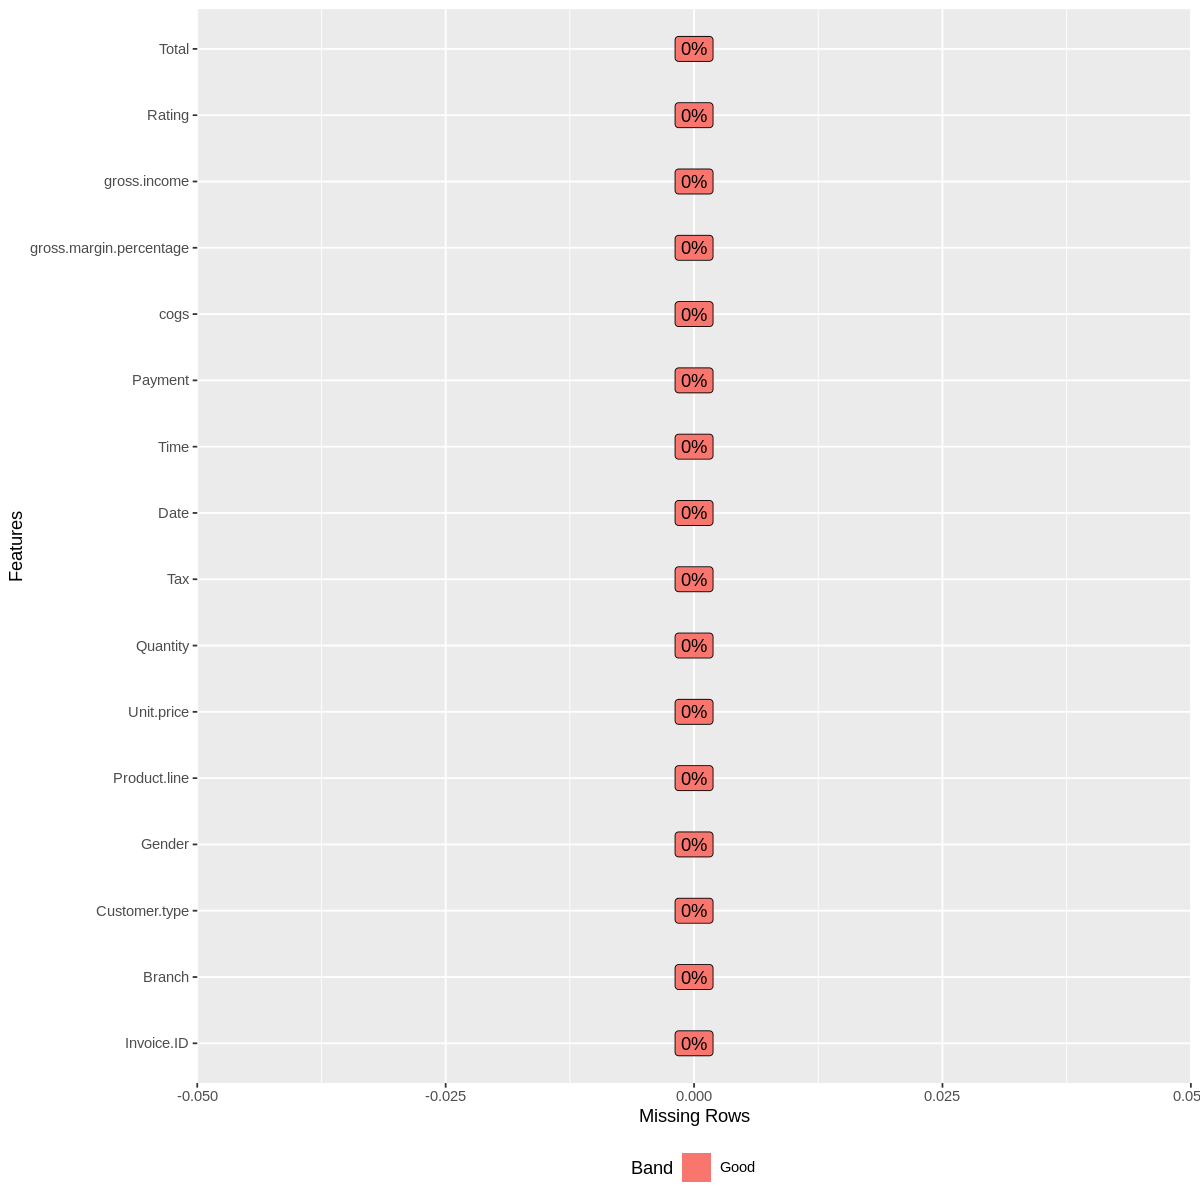

In [16]:
plot_missing(Df1)

We see that there aren't any missing values or duplicates, we proceed to tidy the dataset prior to individual and cluster attribute analysis

In [17]:
#we isolate numerical columns
Numericals <- select_if(Df1, is.numeric)
head(Numericals)

,Unit.price,Quantity,Tax,cogs,gross.margin.percentage,gross.income,Rating,Total
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,74.69,7,26.1415,522.83,4.761905,26.1415,9.1,548.9715
2,15.28,5,3.8200,76.40,4.761905,3.8200,9.6,80.2200
3,46.33,7,16.2155,324.31,4.761905,16.2155,7.4,340.5255
4,58.22,8,23.2880,465.76,4.761905,23.2880,8.4,489.0480
5,86.31,7,30.2085,604.17,4.761905,30.2085,5.3,634.3785
6,85.39,7,29.8865,597.73,4.761905,29.8865,4.1,627.6165


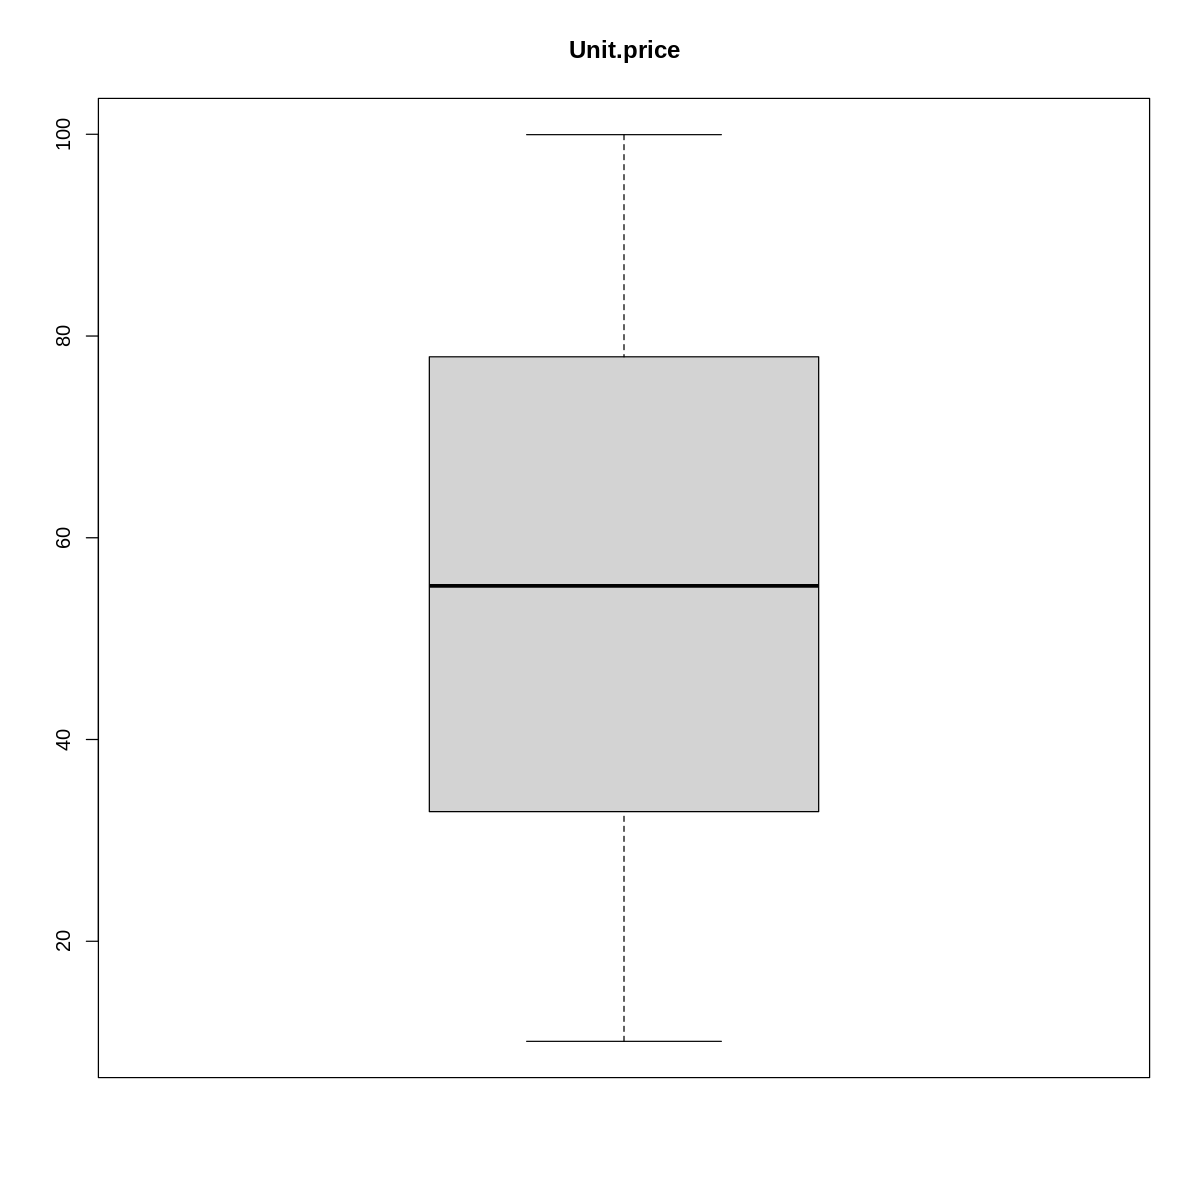

In [18]:
boxplot(Numericals[,1], main="Unit.price")

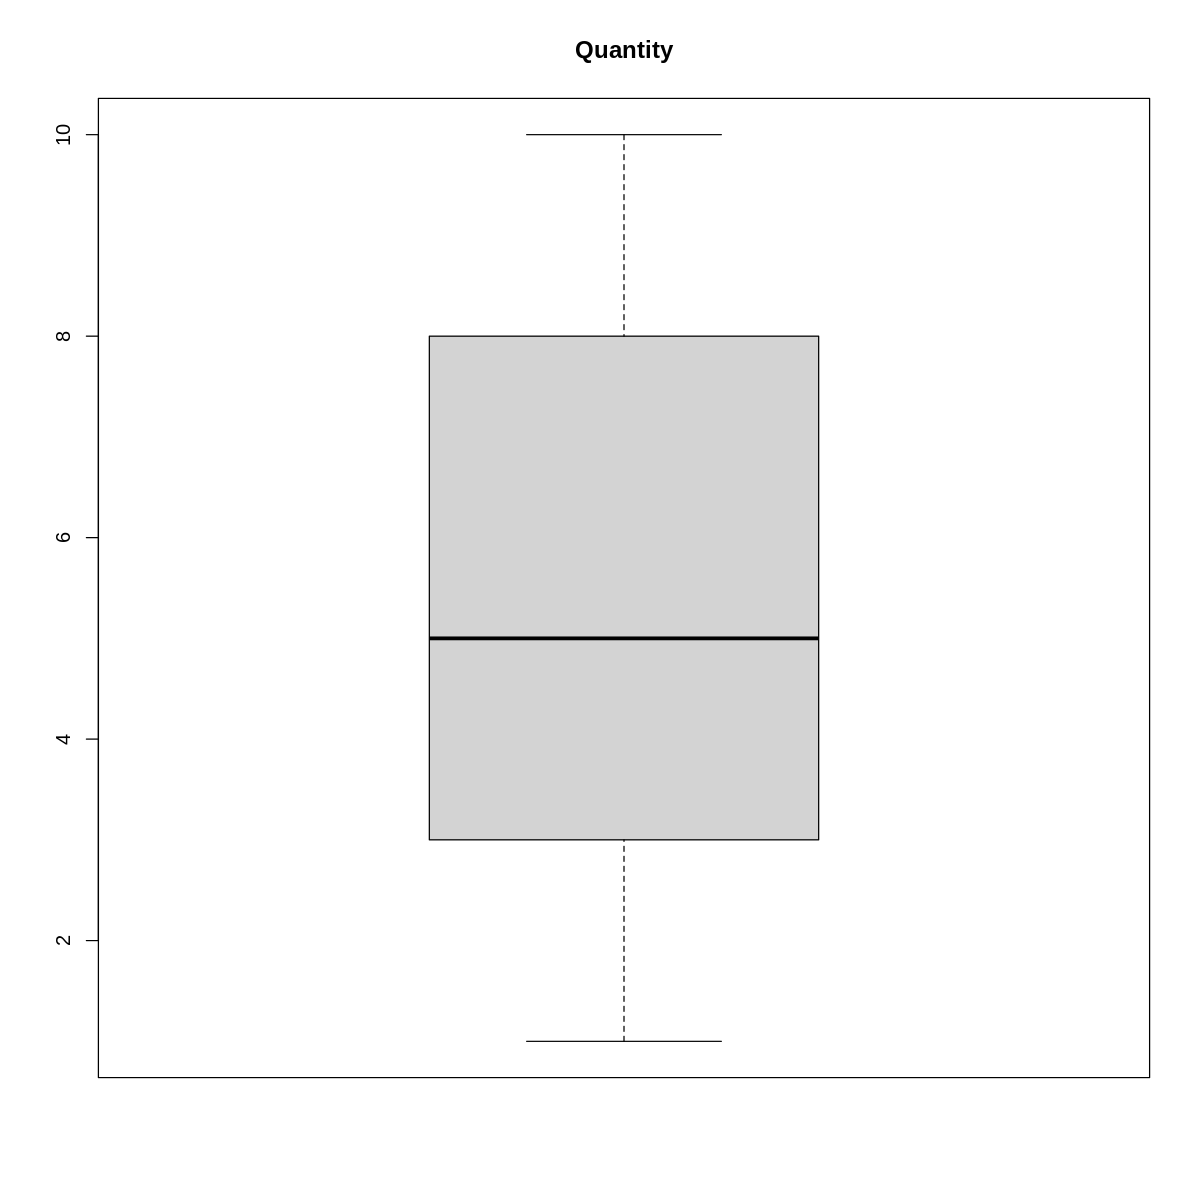

In [19]:
boxplot(Numericals[,2], main="Quantity")

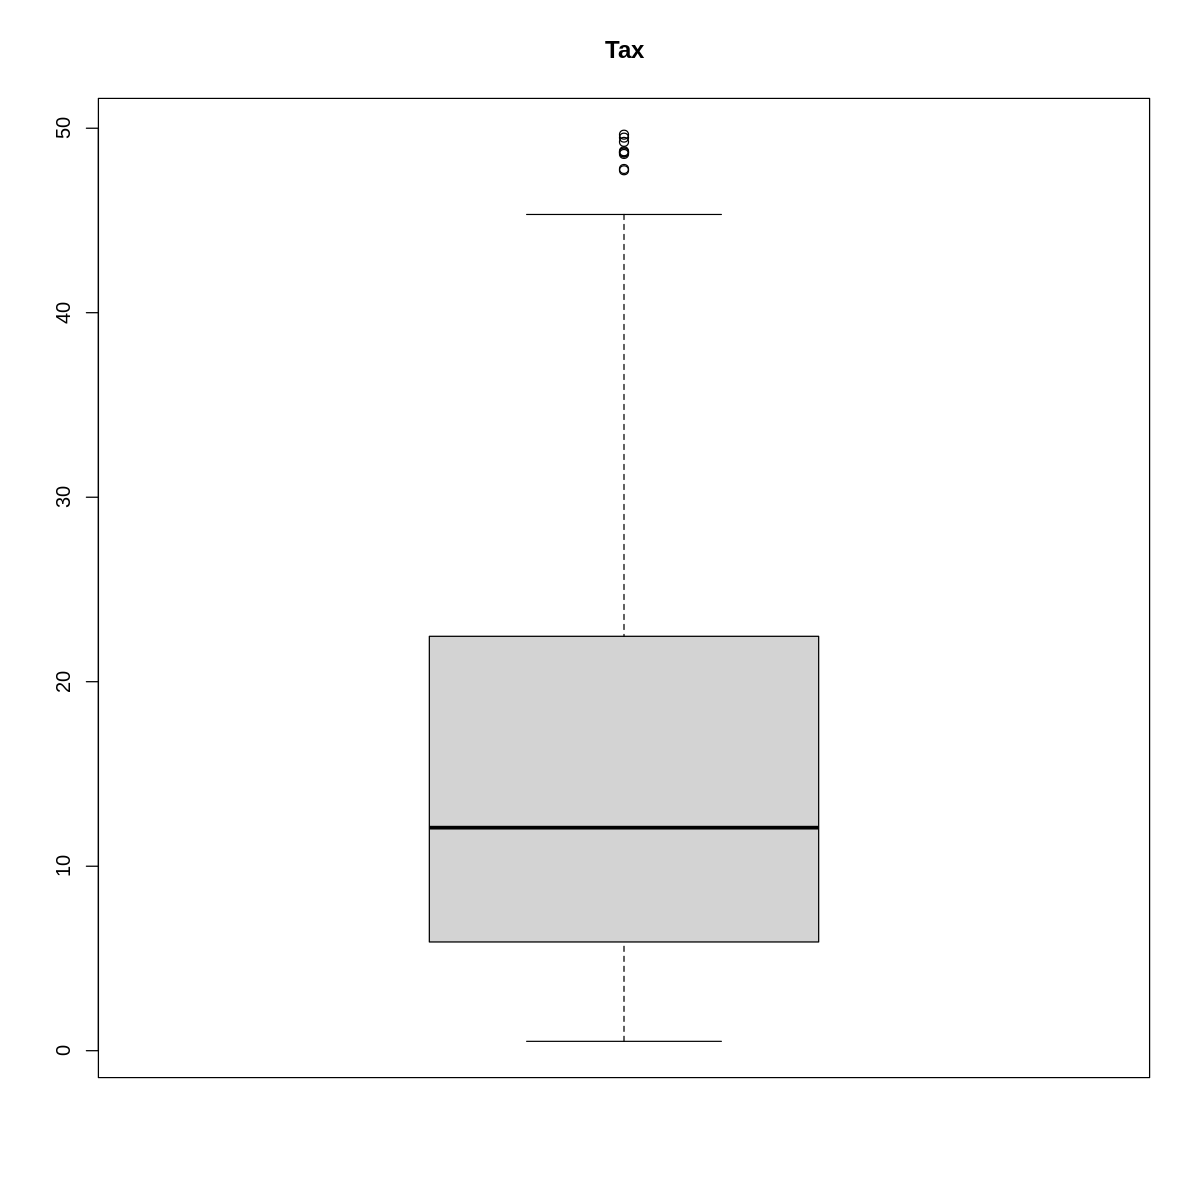

In [20]:
boxplot(Numericals[,3], main="Tax")

In [21]:
#we check for the actual values of the outliers in the Tax columns

data.frame(boxplot.stats(Numericals$Tax)$out)


boxplot.stats.Numericals.Tax..out
<dbl>
47.790
49.490
49.650
47.720
48.605
49.260
48.750
48.685
48.690


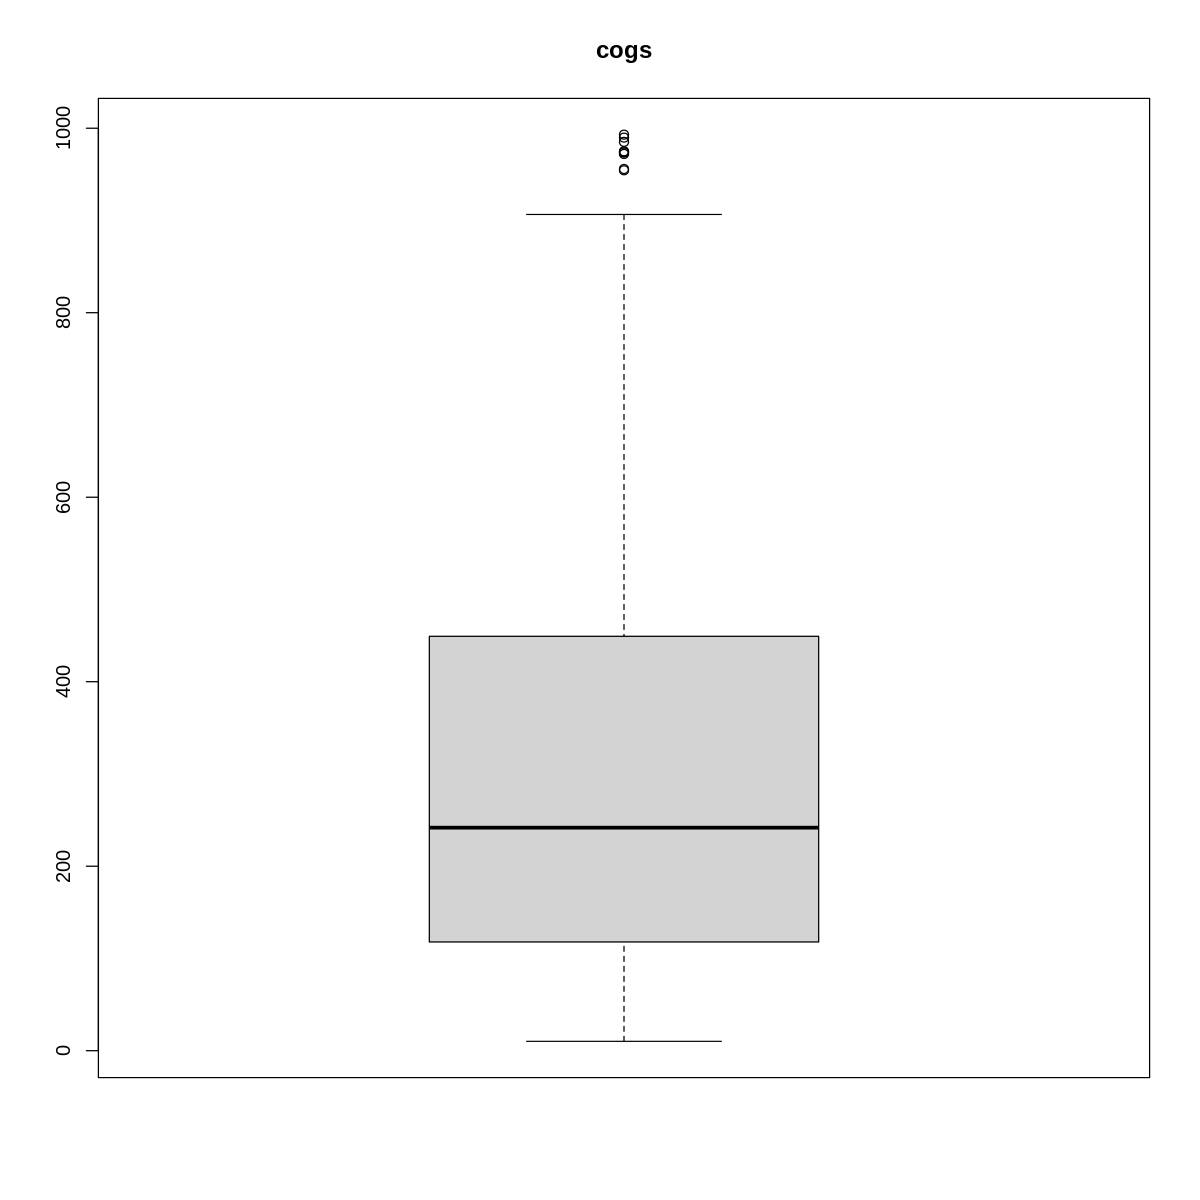

In [22]:
# checking in the cogs column
boxplot(Numericals[,4], main="cogs")

In [23]:
#we check for the actual values of the outliers in the cogs columns

data.frame(boxplot.stats(Numericals$cogs)$out)

boxplot.stats.Numericals.cogs..out
<dbl>
955.8
989.8
993.0
954.4
972.1
985.2
975.0
973.7
973.8


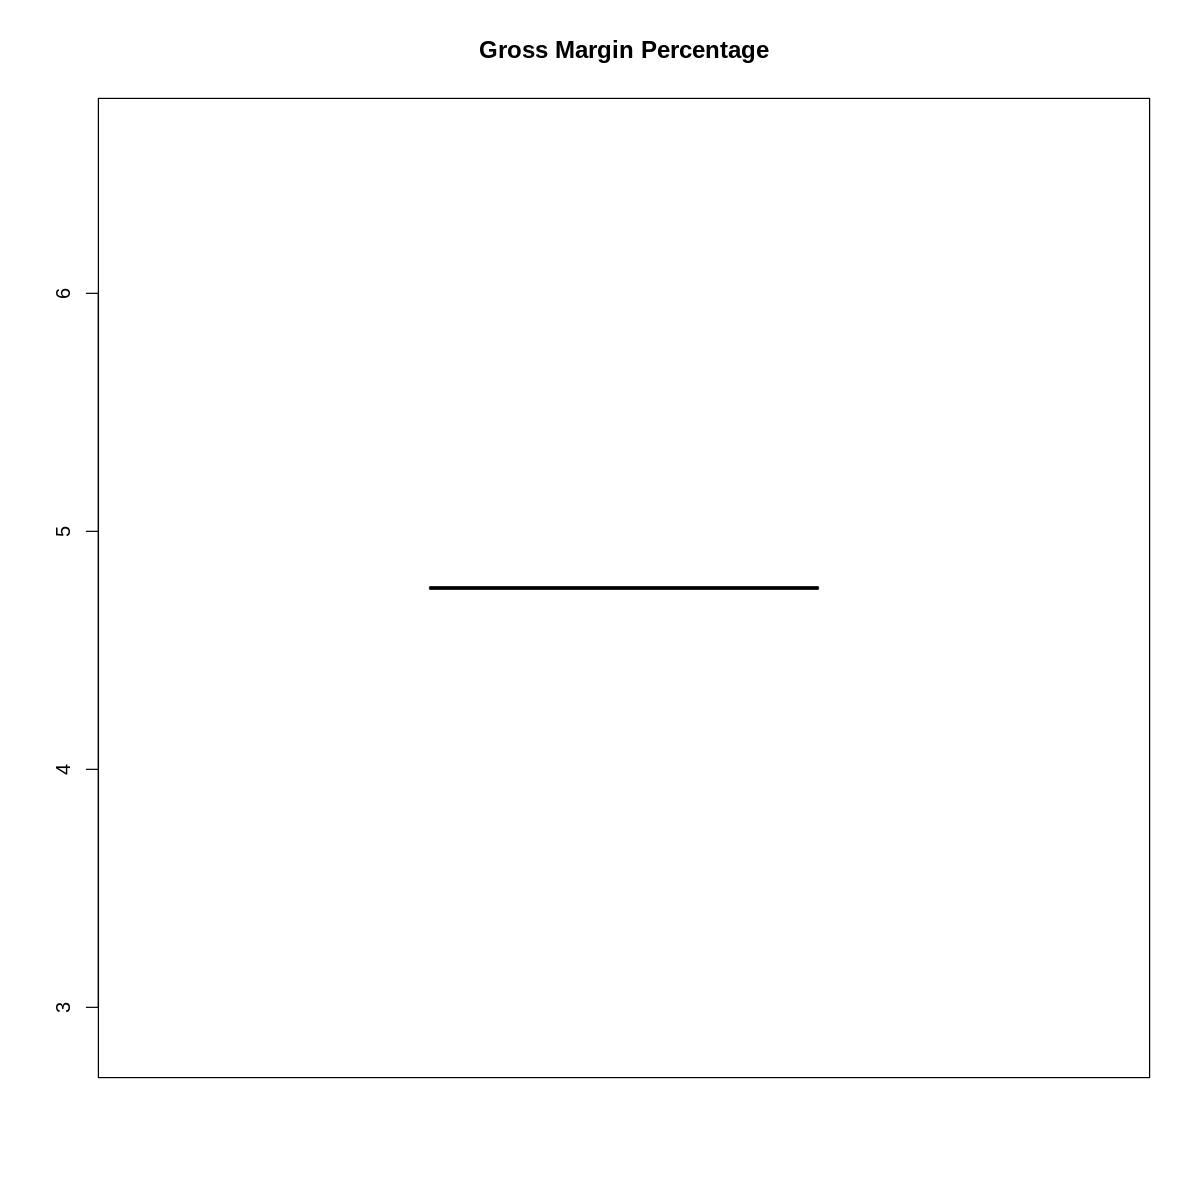

In [24]:
boxplot(Numericals[,5], main="Gross Margin Percentage")

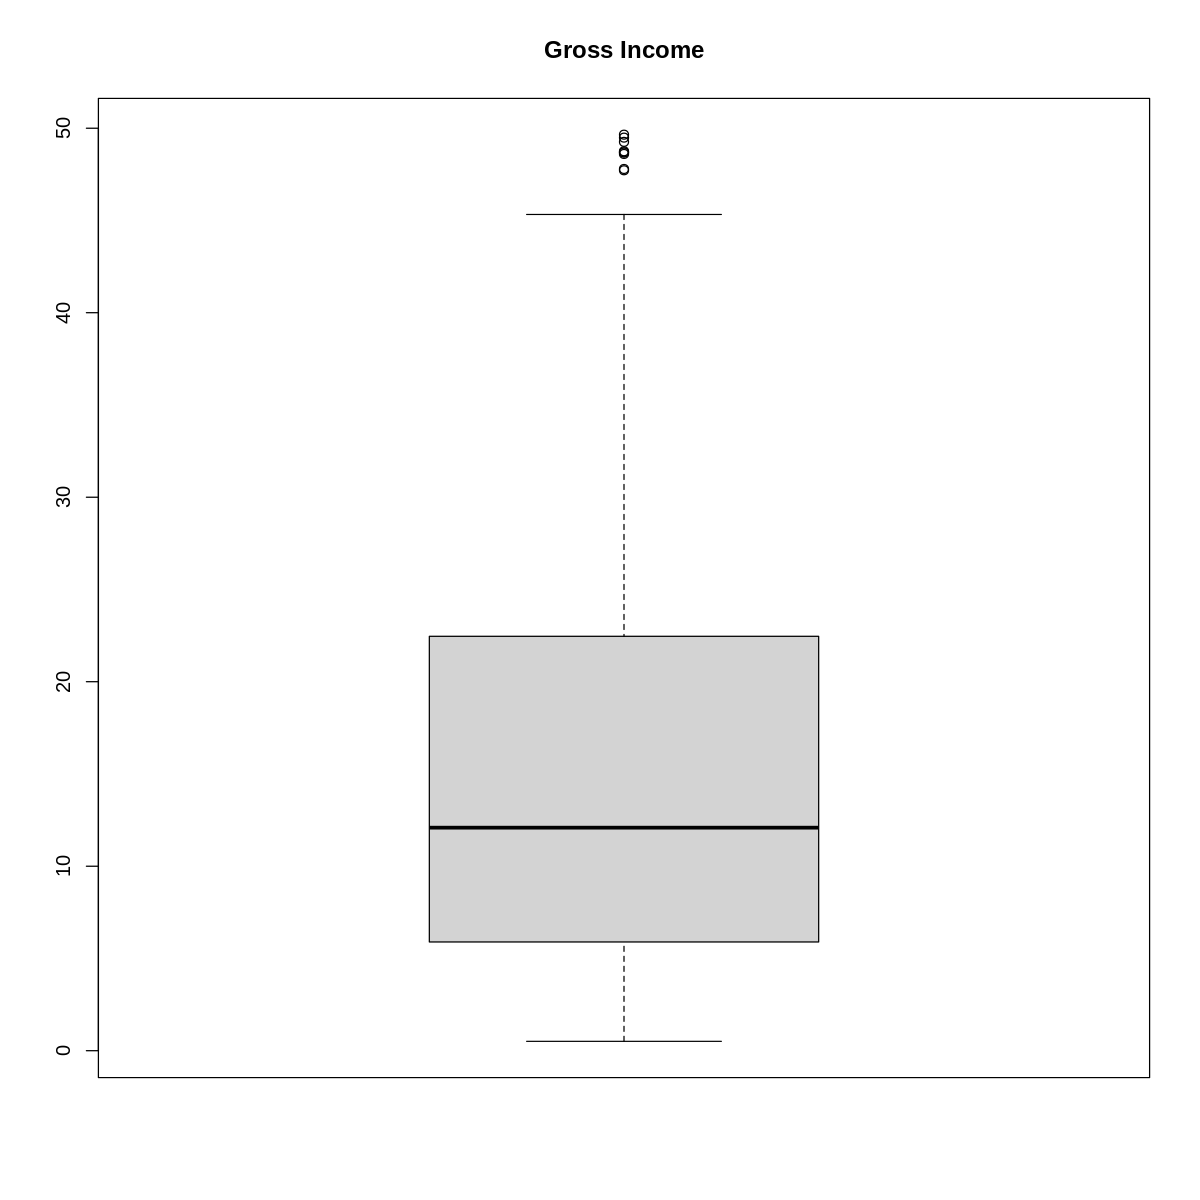

In [25]:
boxplot(Numericals[,6], main="Gross Income")

In [26]:
# we check for the actual values of the outliers in the Gross Income columns
data.frame(boxplot.stats(Numericals$gross.income)$out)

boxplot.stats.Numericals.gross.income..out
<dbl>
47.790
49.490
49.650
47.720
48.605
49.260
48.750
48.685
48.690


In [27]:
Tax_gross <- Df1[, c(8, 14)]
print(unique(Tax_gross$Tax == Tax_gross$gross.income))

[1] TRUE


The values look similar to those in the Tax column, we check if this is the case with all values and see they contain the same values. We shall then drop the tax column.

In [28]:
Df1 <- Df1[-c(8)]


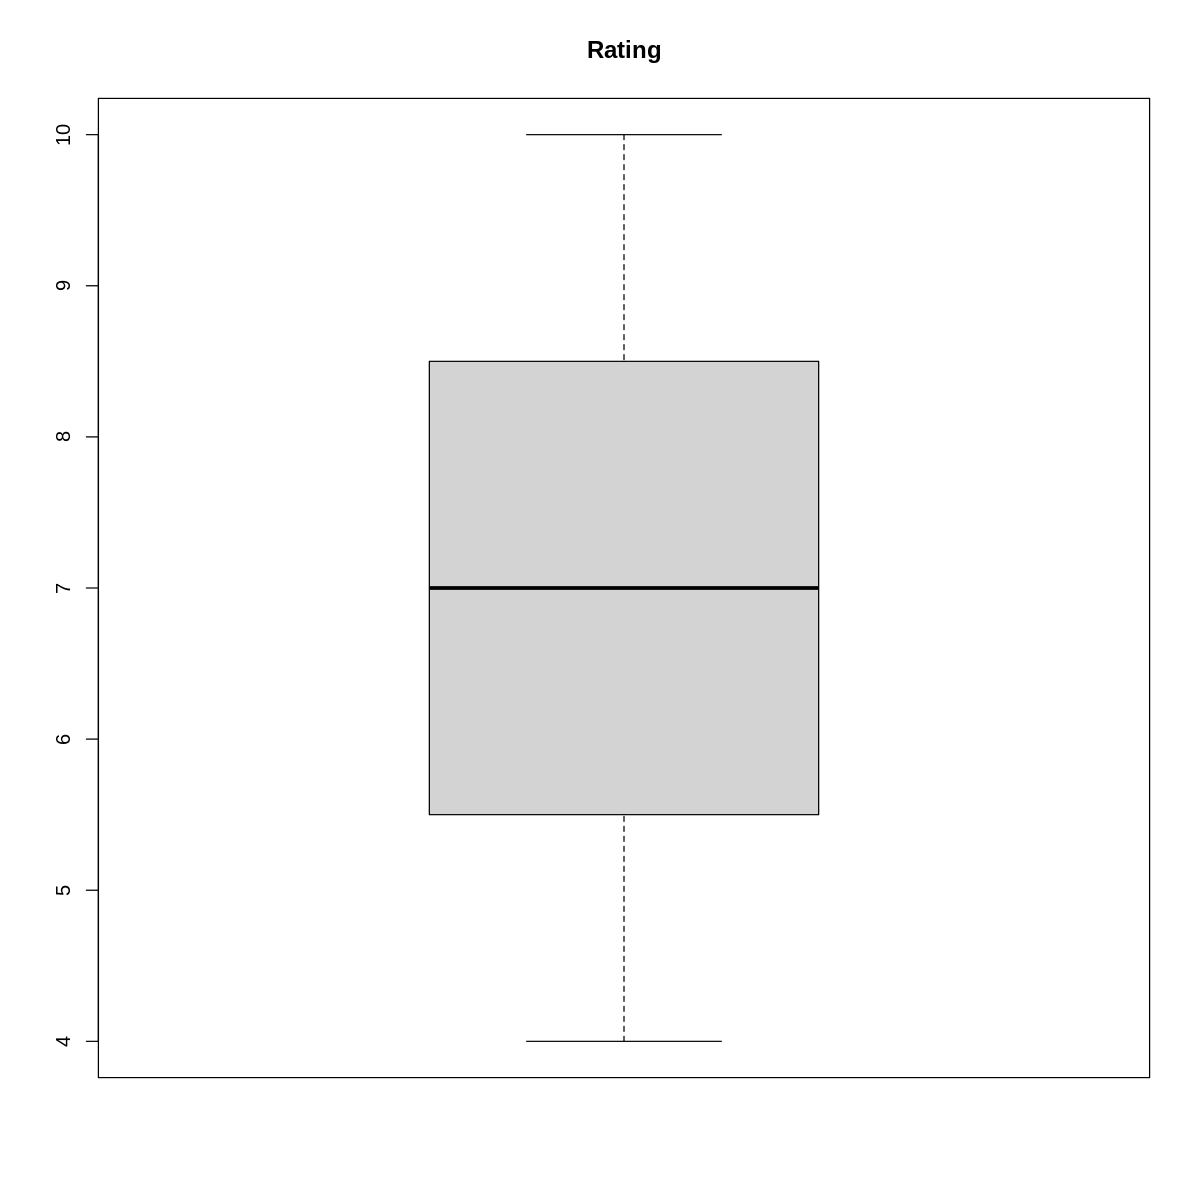

In [29]:
boxplot(Numericals[,7], main="Rating")

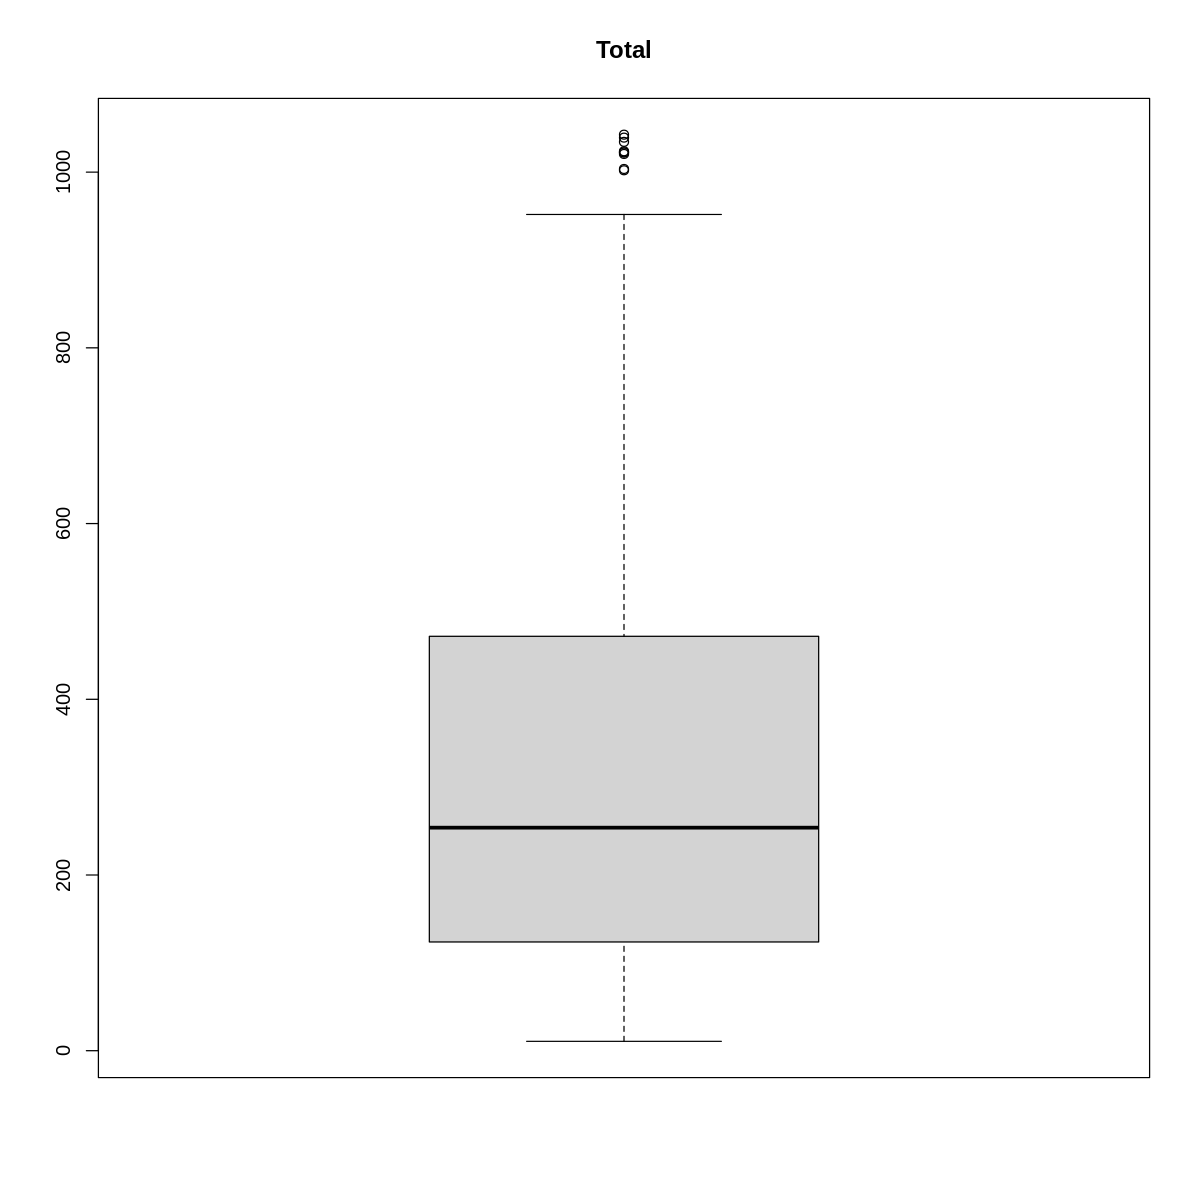

In [30]:
boxplot(Numericals[,8], main="Total")

In [31]:
data.frame(boxplot.stats(Numericals$Total)$out)

boxplot.stats.Numericals.Total..out
<dbl>
1003.590
1039.290
1042.650
1002.120
1020.705
1034.460
1023.750
1022.385
1022.490


In [32]:
# change categorical variables to factors
Df1$Branch <- factor(Df1$Branch)
Df1$Customer.type <- factor(Df1$Customer.type)
Df1$Gender <- factor(Df1$Gender)
Df1$Product.line <- factor(Df1$Product.line)
Df1$Payment <- factor(Df1$Payment)

In [33]:
# encode categorical variables
Categorical <- Df1[,c('Branch','Customer.type','Gender','Product.line','Payment')]
Encoded <- data.matrix(Categorical)
head(Encoded)

Branch,Customer.type,Gender,Product.line,Payment
1,1,1,4,3
3,2,1,1,1
1,2,2,5,2
1,1,2,4,3
1,2,2,6,3
3,2,2,1,3


In [34]:
# replace categorical variables with encoded columns
Data <- Df1[c('Invoice.ID','Unit.price','Quantity','Date','Time','cogs','gross.income','Rating','Total')]

Supermarket <- cbind(Data, Encoded) # merge the two data frames
Supermarket <- data.frame(Supermarket)
head(Supermarket)

,Invoice.ID,Unit.price,Quantity,Date,Time,cogs,gross.income,Rating,Total,Branch,Customer.type,Gender,Product.line,Payment
,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,750-67-8428,74.69,7,1/5/2019,13:08,522.83,26.1415,9.1,548.9715,1,1,1,4,3
2,226-31-3081,15.28,5,3/8/2019,10:29,76.40,3.8200,9.6,80.2200,3,2,1,1,1
3,631-41-3108,46.33,7,3/3/2019,13:23,324.31,16.2155,7.4,340.5255,1,2,2,5,2
4,123-19-1176,58.22,8,1/27/2019,20:33,465.76,23.2880,8.4,489.0480,1,1,2,4,3
5,373-73-7910,86.31,7,2/8/2019,10:37,604.17,30.2085,5.3,634.3785,1,2,2,6,3
6,699-14-3026,85.39,7,3/25/2019,18:30,597.73,29.8865,4.1,627.6165,3,2,2,1,3


## a) Univariate Analysis

In [35]:
names(Df1)

[1] "Invoice.ID"              "Branch"                 
 [3] "Customer.type"           "Gender"                 
 [5] "Product.line"            "Unit.price"             
 [7] "Quantity"                "Date"                   
 [9] "Time"                    "Payment"                
[11] "cogs"                    "gross.margin.percentage"
[13] "gross.income"            "Rating"                 
[15] "Total"

In [36]:
install.packages("data.table") 
library(data.table)

install.packages('moments') # for dispersion measures
library(moments)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘moments’


The following objects are masked from ‘package:timeDate’:

    kurtosis, skewness




In [38]:
summary(Df1)

  Invoice.ID        Branch  Customer.type    Gender   
 Length:1000        A:340   Member:501    Female:501  
 Class :character   B:332   Normal:499    Male  :499  
 Mode  :character   C:328                             
                                                      
                                                      
                                                      
                 Product.line   Unit.price       Quantity    
 Electronic accessories:170   Min.   :10.08   Min.   : 1.00  
 Fashion accessories   :178   1st Qu.:32.88   1st Qu.: 3.00  
 Food and beverages    :174   Median :55.23   Median : 5.00  
 Health and beauty     :152   Mean   :55.67   Mean   : 5.51  
 Home and lifestyle    :160   3rd Qu.:77.94   3rd Qu.: 8.00  
 Sports and travel     :166   Max.   :99.96   Max.   :10.00  
     Date               Time                  Payment         cogs       
 Length:1000        Length:1000        Cash       :344   Min.   : 10.17  
 Class :character   Class :charac

In [40]:
Numericals <- data.table(Numericals)

In [42]:
Numericals[,lapply(.SD, mean)]

Unit.price,Quantity,Tax,cogs,gross.margin.percentage,gross.income,Rating,Total
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
55.67213,5.51,15.37937,307.5874,4.761905,15.37937,6.9727,322.9667


In [43]:
Numericals[,lapply(.SD, median)]

Unit.price,Quantity,Tax,cogs,gross.margin.percentage,gross.income,Rating,Total
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
55.23,5,12.088,241.76,4.761905,12.088,7,253.848


In [41]:
#we move to summary statistics
Numericals[,lapply(.SD, sd)]

Unit.price,Quantity,Tax,cogs,gross.margin.percentage,gross.income,Rating,Total
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
26.49463,2.923431,11.70883,234.1765,0,11.70883,1.71858,245.8853


In [45]:
Numericals[,lapply(.SD, var)]

Unit.price,Quantity,Tax,cogs,gross.margin.percentage,gross.income,Rating,Total
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
701.9653,8.546446,137.0966,54838.64,0,137.0966,2.953518,60459.6


In [48]:
Numericals[,lapply(.SD, skewness)]

Unit.price,Quantity,Tax,cogs,gross.margin.percentage,gross.income,Rating,Total
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.007066827,0.01292163,0.8912304,0.8912304,NaN,0.8912304,0.008996129,0.8912304


In [49]:
Numericals[,lapply(.SD, kurtosis)]

Unit.price,Quantity,Tax,cogs,gross.margin.percentage,gross.income,Rating,Total
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.781499,1.784528,2.91253,2.91253,NaN,2.91253,1.848169,2.91253


In [46]:
getmode <- function(v) {
  uniqv <- unique(v)
  uniqv[which.max(tabulate(match(v, uniqv)))]
}

In [47]:
number <- names(Supermarket)
for (i in number ){
  ad_mode <- getmode(Supermarket[, i])
  print("The mode for")
  print(colnames(Supermarket[i]))
  print(ad_mode)
}

[1] "The mode for"
[1] "Invoice.ID"
[1] "750-67-8428"
[1] "The mode for"
[1] "Unit.price"
[1] 83.77
[1] "The mode for"
[1] "Quantity"
[1] 10
[1] "The mode for"
[1] "Date"
[1] "2/7/2019"
[1] "The mode for"
[1] "Time"
[1] "19:48"
[1] "The mode for"
[1] "cogs"
[1] 789.6
[1] "The mode for"
[1] "gross.income"
[1] 39.48
[1] "The mode for"
[1] "Rating"
[1] 6
[1] "The mode for"
[1] "Total"
[1] 829.08
[1] "The mode for"
[1] "Branch"
[1] 1
[1] "The mode for"
[1] "Customer.type"
[1] 1
[1] "The mode for"
[1] "Gender"
[1] 1
[1] "The mode for"
[1] "Product.line"
[1] 2
[1] "The mode for"
[1] "Payment"
[1] 3


In [52]:
names(Supermarket)

[1] "Invoice.ID"    "Unit.price"    "Quantity"      "Date"         
 [5] "Time"          "cogs"          "gross.income"  "Rating"       
 [9] "Total"         "Branch"        "Customer.type" "Gender"       
[13] "Product.line"  "Payment"

In [55]:
Supermarket <- Supermarket[, -1]

In [57]:
dim(Supermarket)

[1] 1000   13

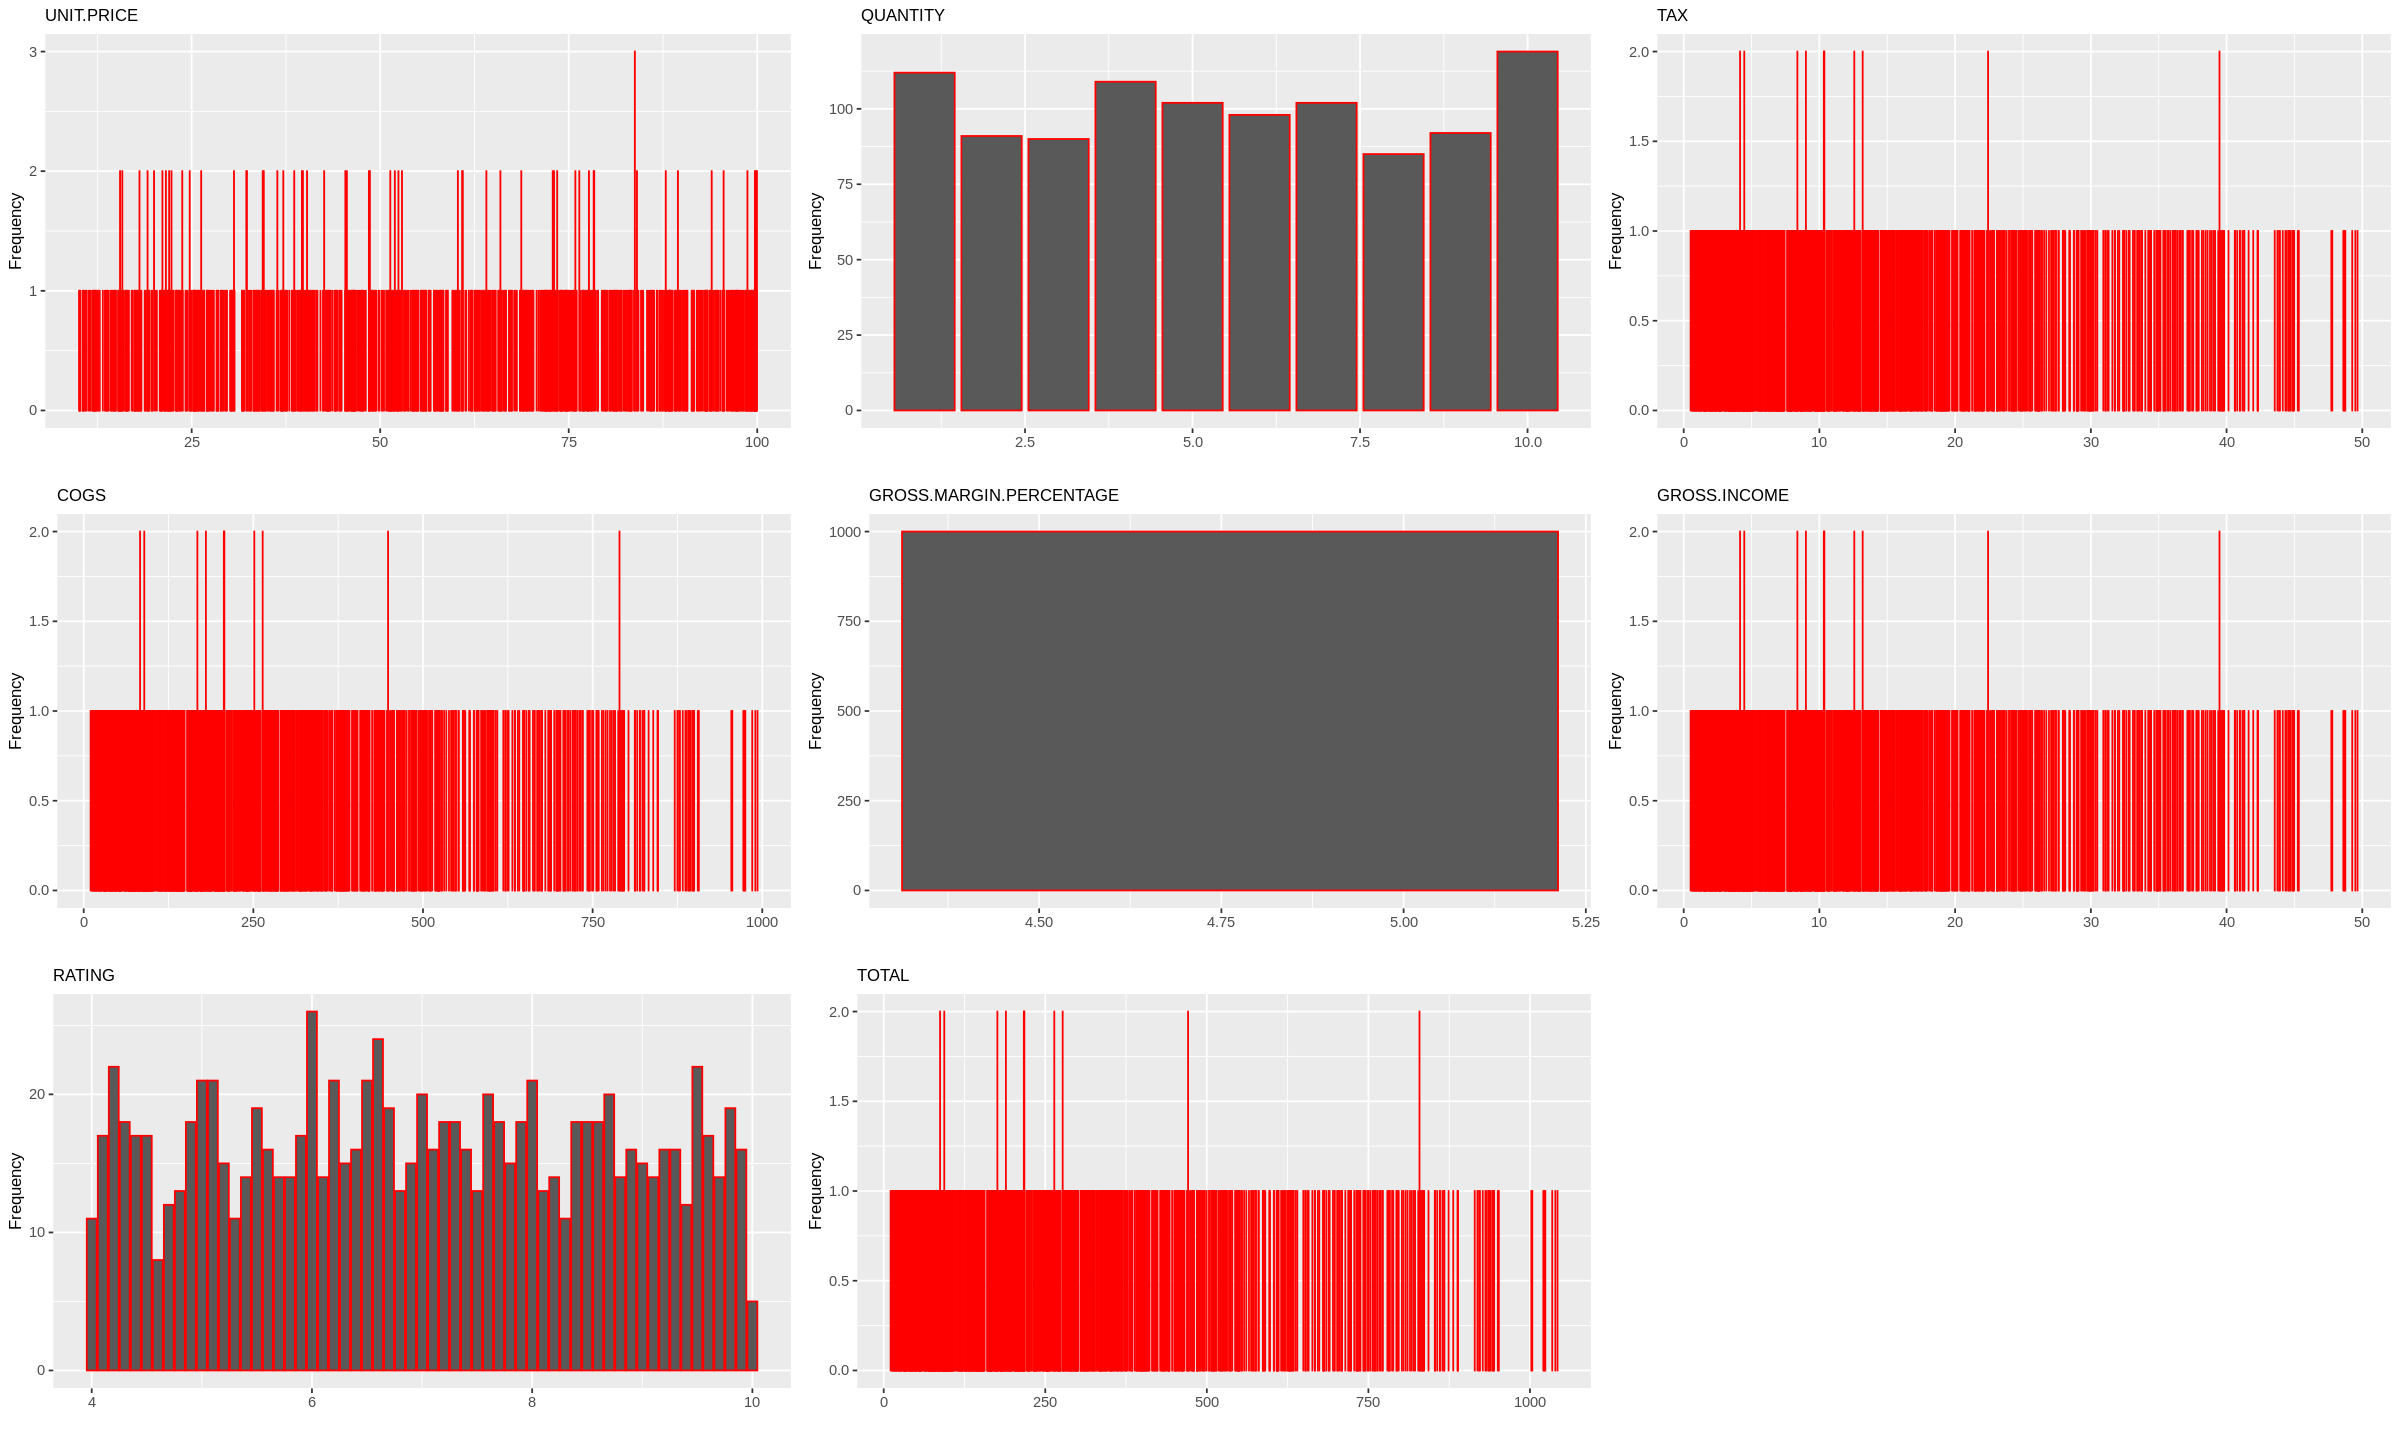

In [63]:
# Plotting histograms
fac_cols = names(Numericals)
columns = colnames(select(Numericals, fac_cols))

p = list()
options(repr.plot.width = 20, repr.plot.height = 12)
for (i in 1:8){
  p[[i]] = ggplot(Numericals, aes_string(columns[i])) + geom_bar(color ="red") + labs(y = 'Frequency', x = '', title = toupper(columns[i])) +
  theme(plot.title = element_text(size = 10),
       axis.title.y = element_text(size = 10))
}

do.call(grid.arrange, p)

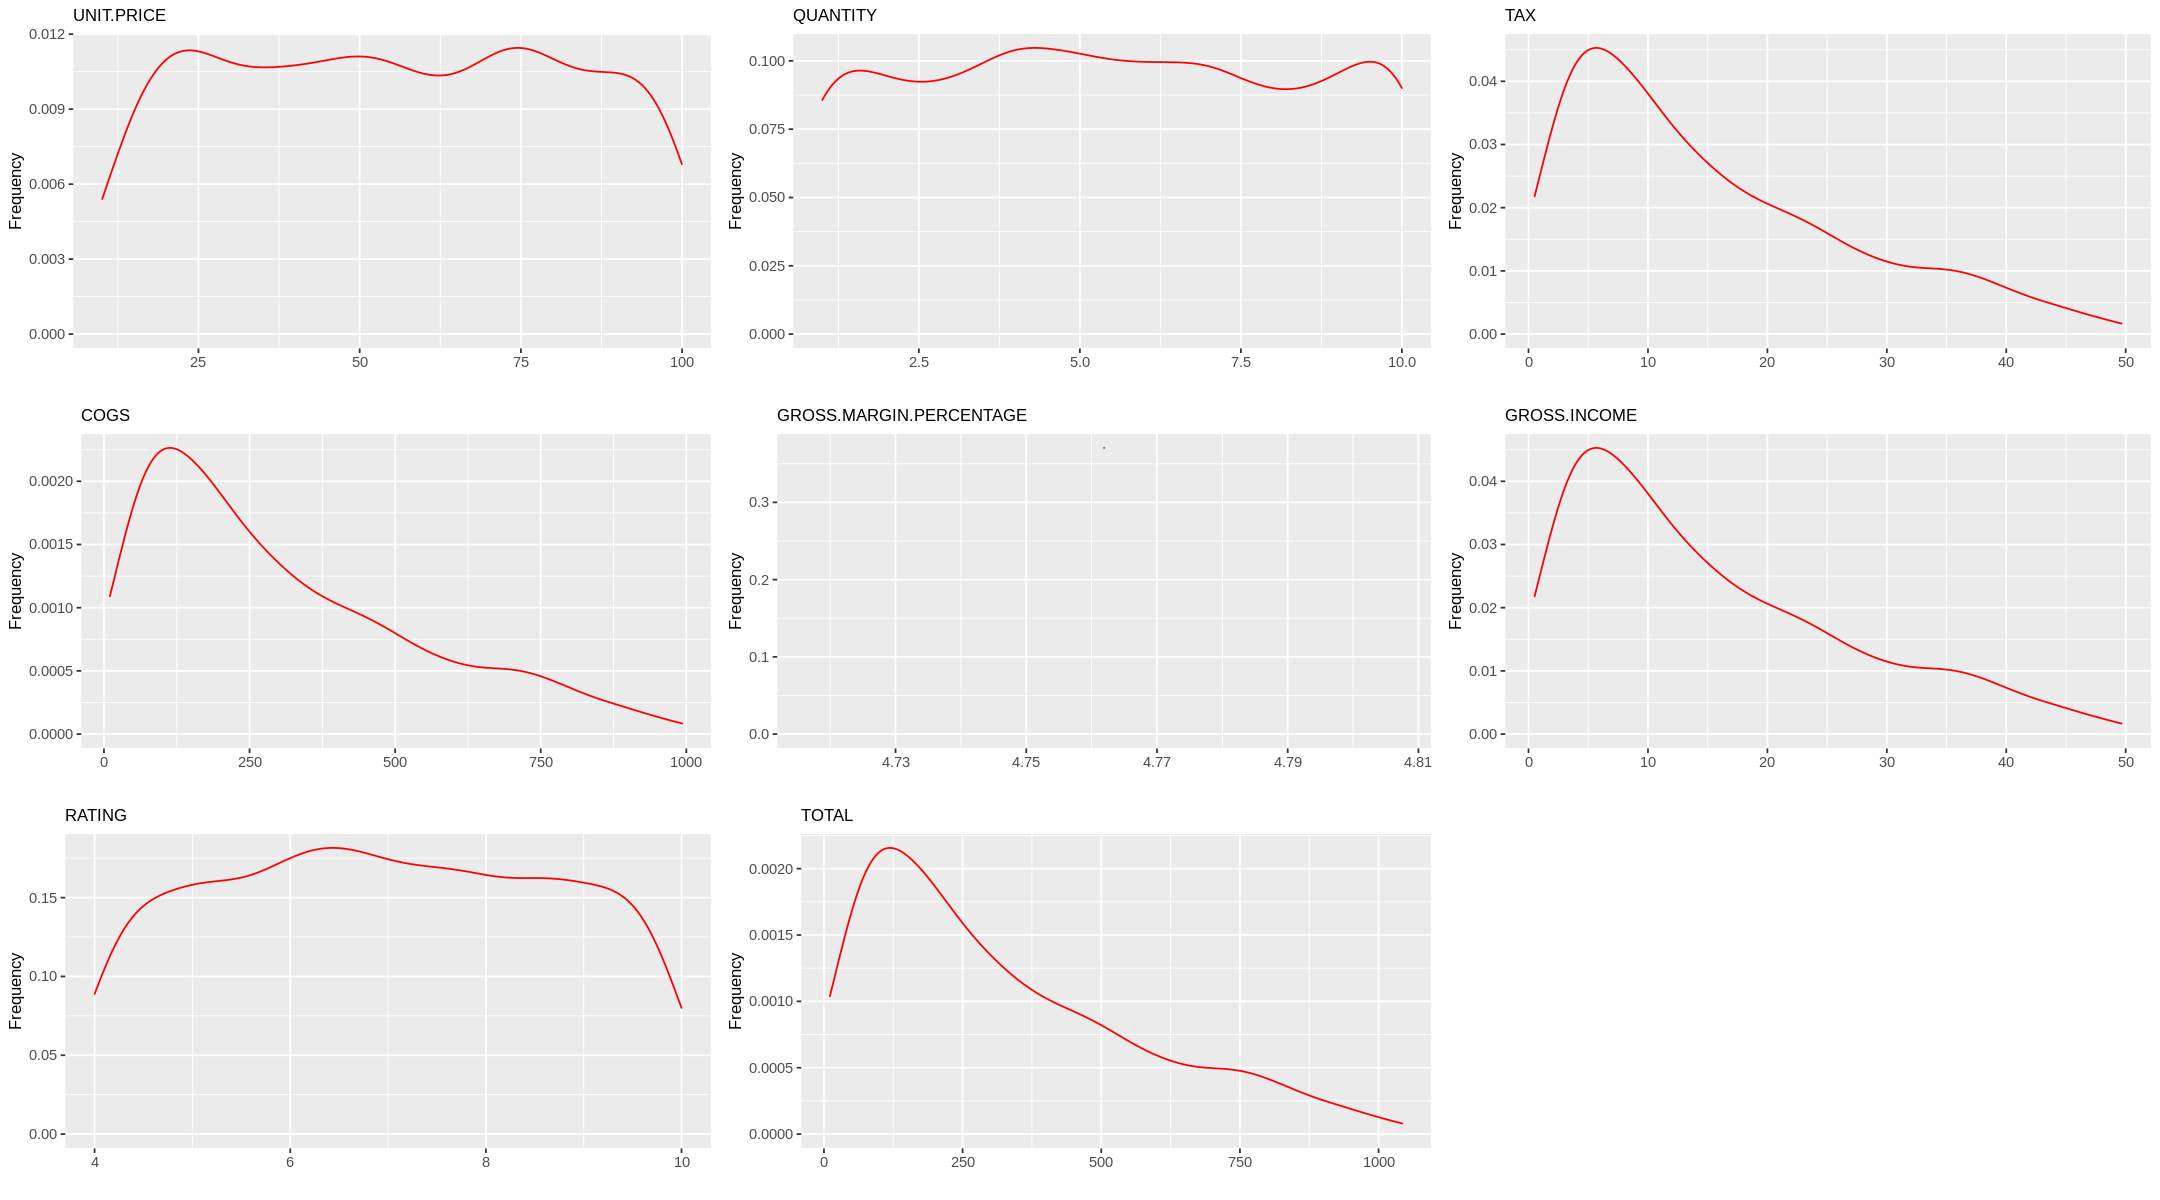

In [61]:
#we plot line graphs
fac_cols = names(Numericals)
columns = colnames(select(Numericals, fac_cols))

p = list()
options(repr.plot.width = 10, repr.plot.height = 10)
for (i in 1:8){
  p[[i]] = ggplot(Numericals, aes_string(columns[i])) + geom_density(color ="red") + labs(y = 'Frequency', x = '', title = toupper(columns[i])) +
  theme(plot.title = element_text(size = 10),
       axis.title.y = element_text(size = 10))
}

do.call(grid.arrange, p)

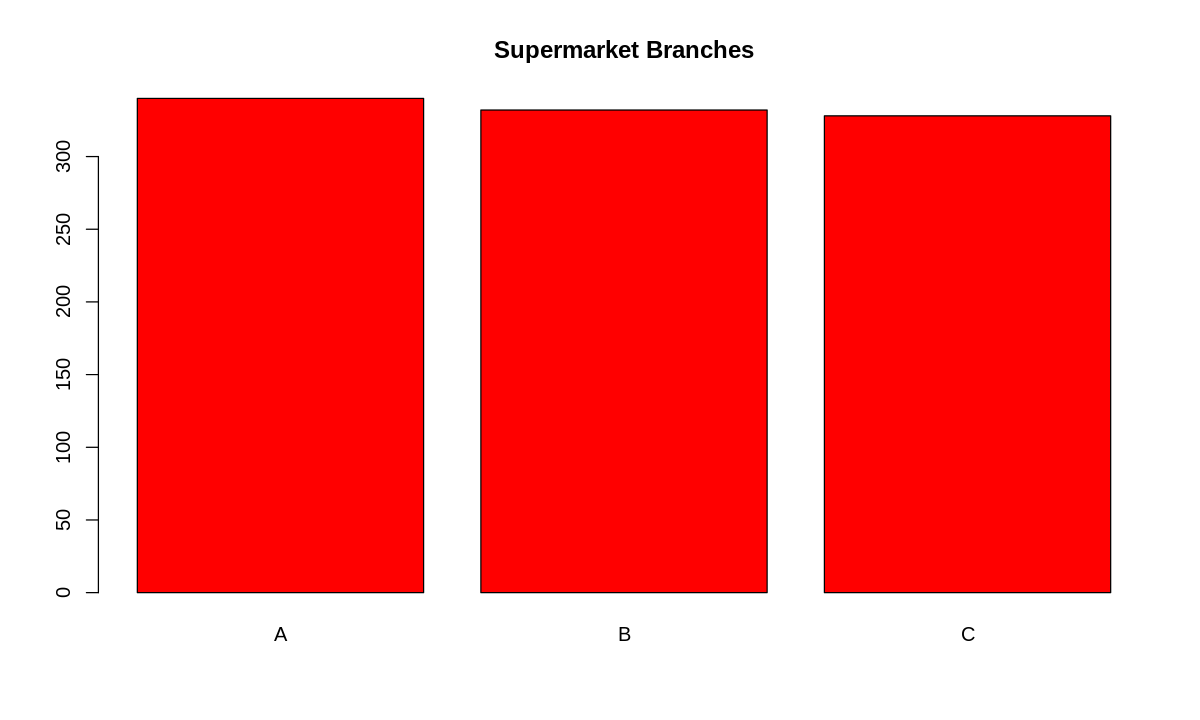

In [66]:
#we plot bar plots for various variables
options(repr.plot.width = 10, repr.plot.height = 6)
barplot(table(Df1$Branch), col="red", main="Supermarket Branches")

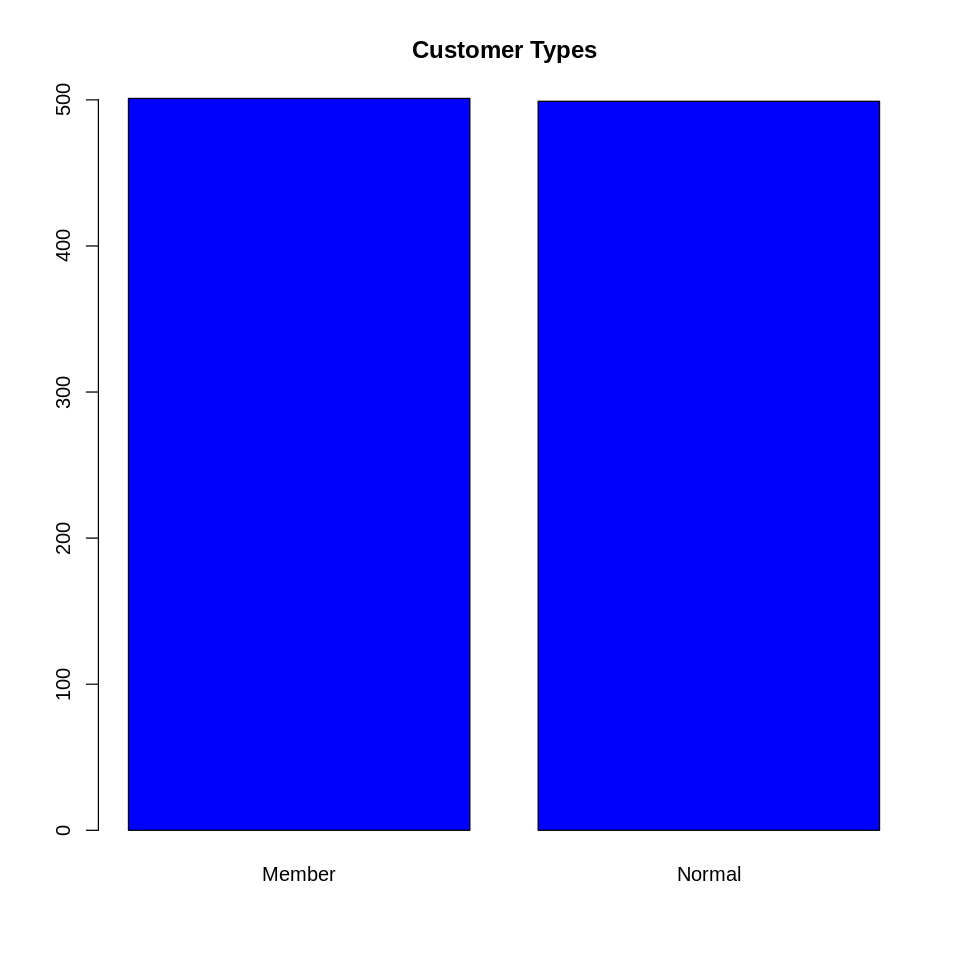

In [73]:
options(repr.plot.width = 8, repr.plot.height = 8)
barplot(table(Df1$Customer.type), col="blue", main="Customer Types")

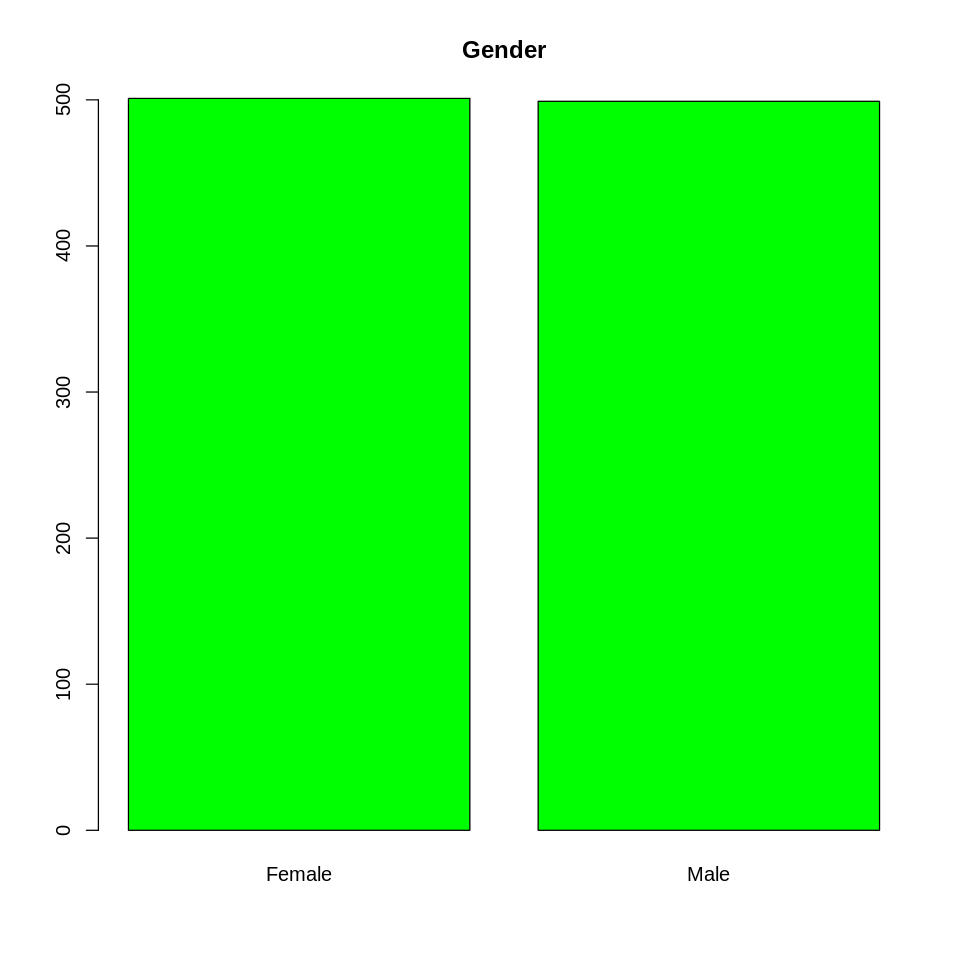

In [72]:
barplot(table(Df1$Gender), col="green", main="Gender")

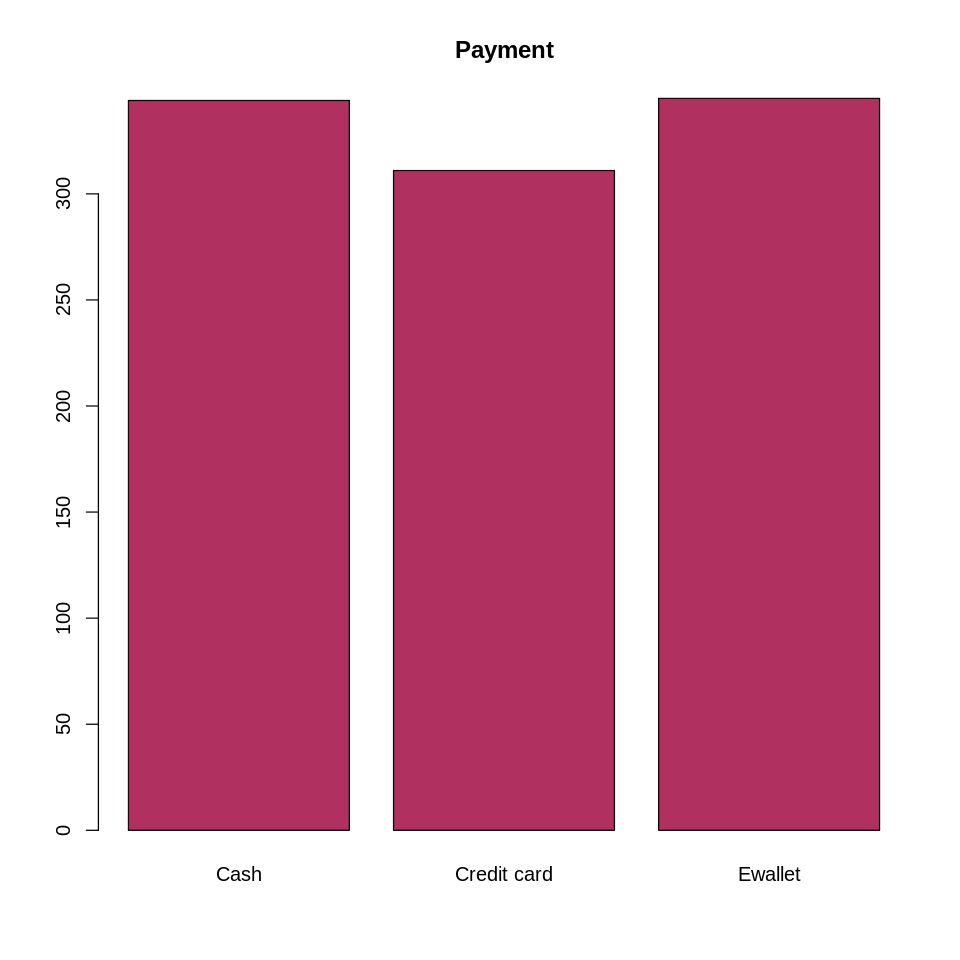

In [74]:
barplot(table(Df1$Payment), col="maroon", main="Payment")

[1] Health and beauty      Electronic accessories Home and lifestyle    
[4] Sports and travel      Food and beverages     Fashion accessories   
6 Levels: Electronic accessories Fashion accessories ... Sports and travel

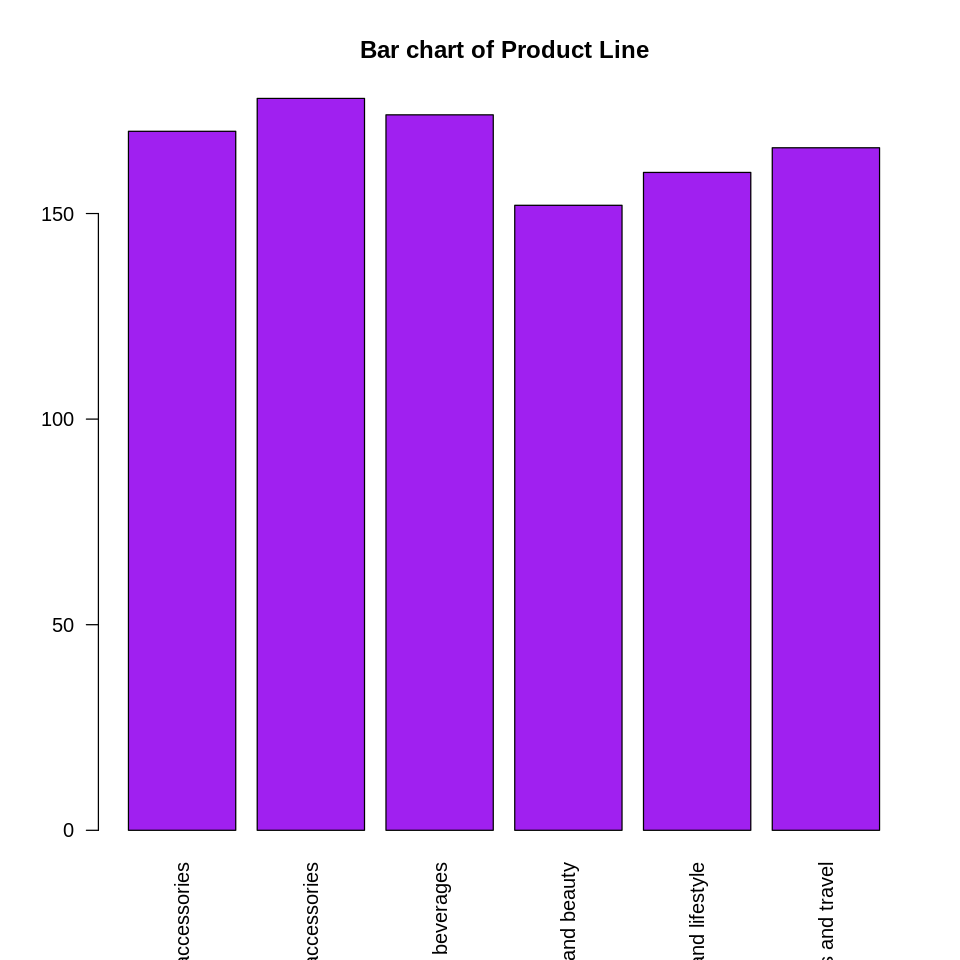

In [77]:

# check product_line popularity
barplot(table(Df1$Product.line), col = "purple", main = "Bar chart of Product Line", las=2)
unique(Df1$Product.line)

- The analysis reveals that the most popular product lines are accessories and product related, with the level  being relatively close. 
- Most people also use ewallets and cash to make their payments, with the rest using credit cards. 
- Females are slightly more than males while there are more normal respondednts than members. The branches also have similar levels of activity, with branch A being the most active.
- The unit price, quantity and rating features do not present skewed distributions, while the remaining numerical variables are positively skewed. 

## b) Bivariate Analysis

In [79]:
cov(Numericals)

,Unit.price,Quantity,Tax,cogs,gross.margin.percentage,gross.income,Rating,Total
Unit.price,701.9653313,0.83477848,196.6683401,3933.36680,0,196.6683401,-0.39966752,4130.03514
Quantity,0.8347785,8.54644645,24.1495704,482.99141,0,24.1495704,-0.07945646,507.14098
Tax,196.6683401,24.14957038,137.0965941,2741.93188,0,137.0965941,-0.73330028,2879.02848
cogs,3933.3668019,482.99140761,2741.9318829,54838.63766,0,2741.9318829,-14.66600553,57580.56954
gross.margin.percentage,0.0000000,0.00000000,0.0000000,0.00000,0,0.0000000,0.00000000,0.00000
gross.income,196.6683401,24.14957038,137.0965941,2741.93188,0,137.0965941,-0.73330028,2879.02848
Rating,-0.3996675,-0.07945646,-0.7333003,-14.66601,0,-0.7333003,2.95351823,-15.39931
Total,4130.0351420,507.14097799,2879.0284770,57580.56954,0,2879.0284770,-15.39930581,60459.59802


In [80]:
cor(Numericals)

Warning message in cor(Numericals):
“the standard deviation is zero”


,Unit.price,Quantity,Tax,cogs,gross.margin.percentage,gross.income,Rating,Total
Unit.price,1.000000000,0.01077756,0.6339621,0.6339621,NA,0.6339621,-0.008777507,0.6339621
Quantity,0.010777564,1.00000000,0.7055102,0.7055102,NA,0.7055102,-0.015814905,0.7055102
Tax,0.633962089,0.70551019,1.0000000,1.0000000,NA,1.0000000,-0.036441705,1.0000000
cogs,0.633962089,0.70551019,1.0000000,1.0000000,NA,1.0000000,-0.036441705,1.0000000
gross.margin.percentage,NA,NA,NA,NA,1,NA,NA,NA
gross.income,0.633962089,0.70551019,1.0000000,1.0000000,NA,1.0000000,-0.036441705,1.0000000
Rating,-0.008777507,-0.01581490,-0.0364417,-0.0364417,NA,-0.0364417,1.000000000,-0.0364417
Total,0.633962089,0.70551019,1.0000000,1.0000000,NA,1.0000000,-0.036441705,1.0000000


Warning message in cor(Numericals):
“the standard deviation is zero”


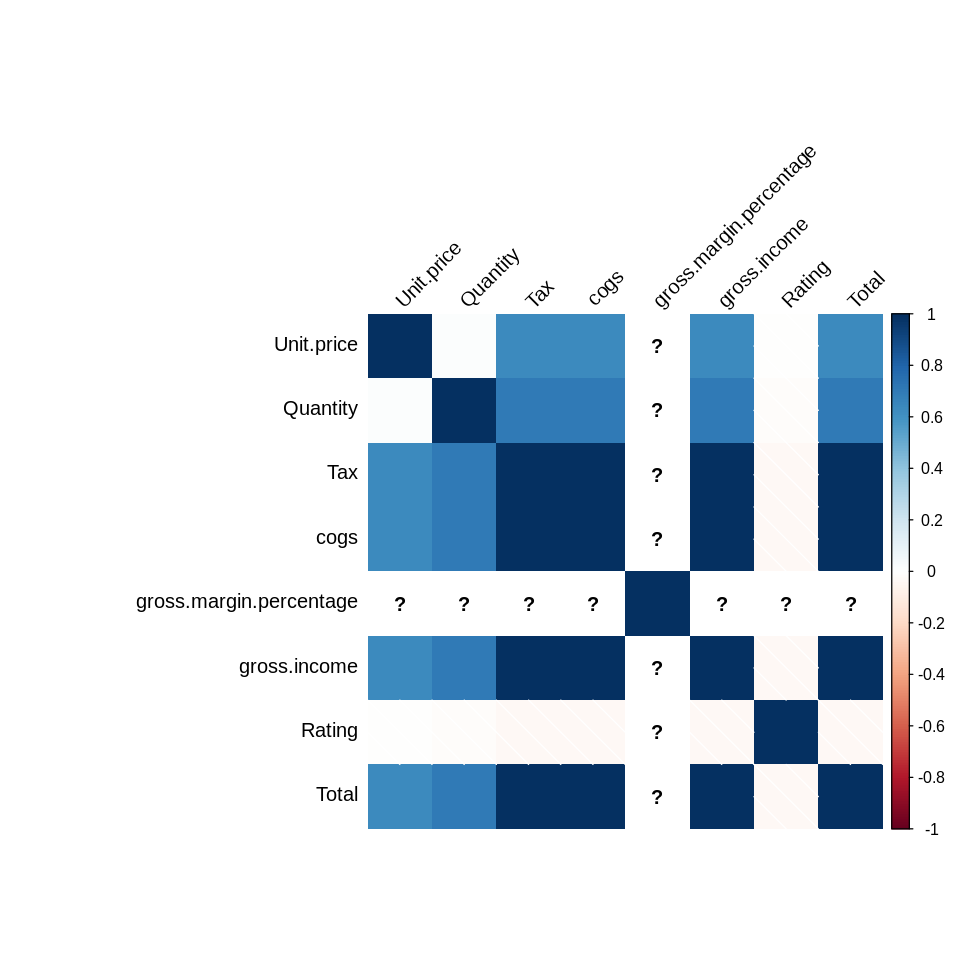

In [81]:
corrplot(cor(Numericals), method="shade", tl.col="black", tl.srt=45)

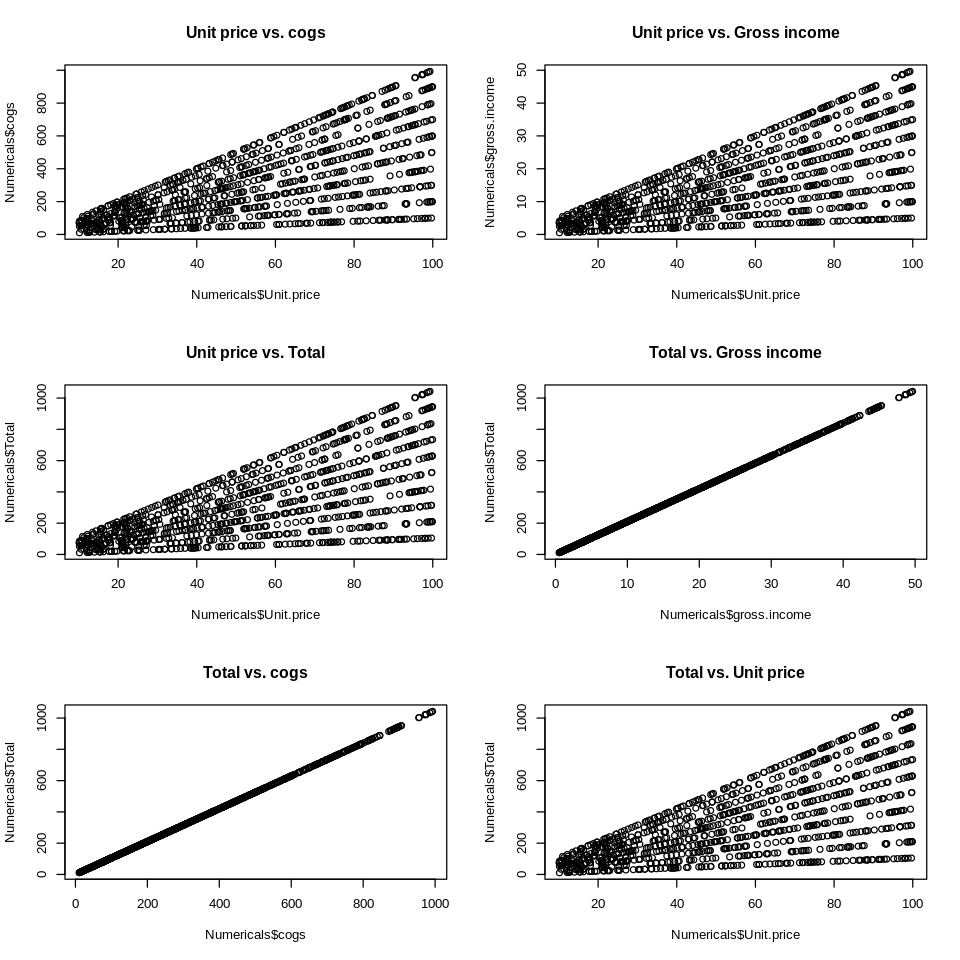

In [82]:
par(mfrow=c(3,2))
plot(Numericals$Unit.price,Numericals$cogs, main="Unit price vs. cogs")
plot(Numericals$Unit.price,Numericals$gross.income, main="Unit price vs. Gross income")
plot(Numericals$Unit.price,Numericals$Total, main="Unit price vs. Total")
plot(Numericals$gross.income,Numericals$Total, main="Total vs. Gross income")
plot(Numericals$cogs, Numericals$Total, main="Total vs. cogs")
plot(Numericals$Unit.price, Numericals$Total, main="Total vs. Unit price")

The scatter plots and correlation plots are indicative of storng correlations between the numerical variables. 

# 7. Implementing the Solution

In [83]:
library(devtools)
install_github("vqv/ggbiplot")
library(ggbiplot)



✔  checking for file ‘/tmp/RtmpRdYLNJ/remotes3956fb7ef6/vqv-ggbiplot-7325e88/DESCRIPTION’
─  preparing ‘ggbiplot’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘ggbiplot_0.55.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: plyr

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from ‘package:purrr’:

    compact


Loading required package: scales


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor


Loading required package: grid



In [85]:
library(plyr)
library(dplyr)
library(grid)

In [86]:
install.packages("factoextra")
require(factoextra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘zip’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘viridis’, ‘car’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘ggrepel’


Loading required package: factoextra

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



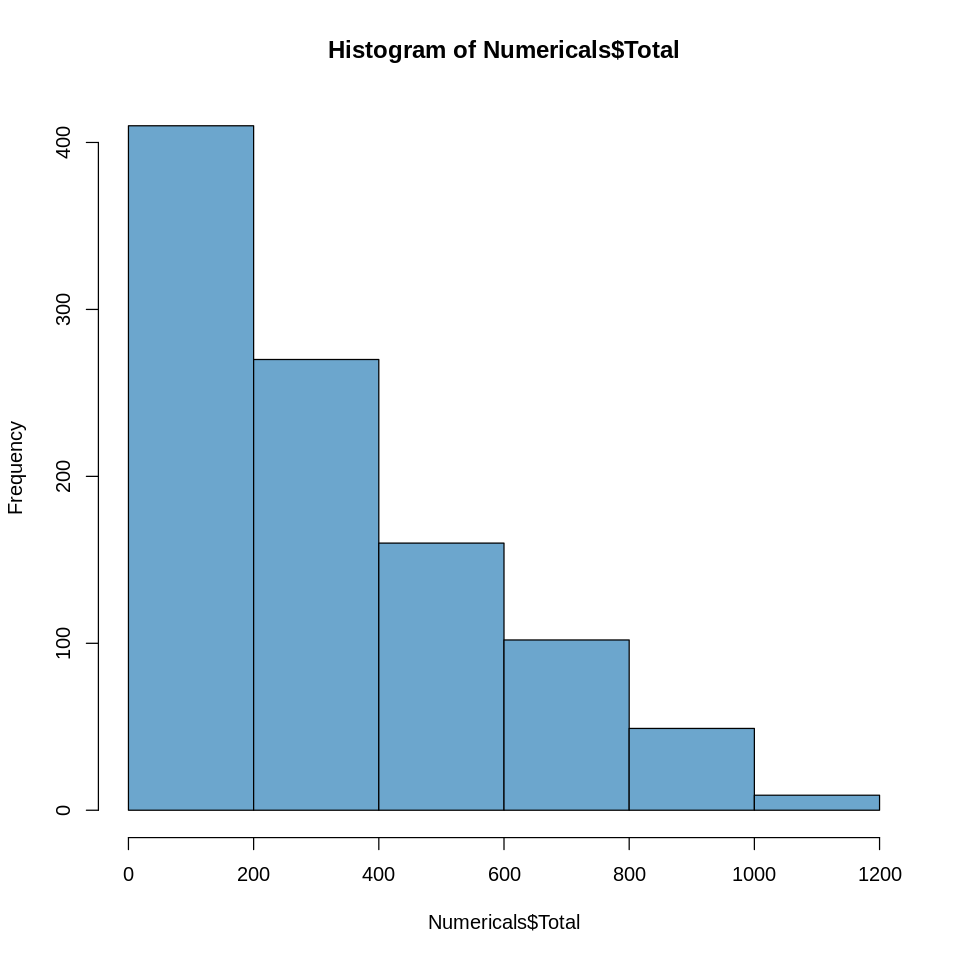

In [87]:
# create label variable using total
# examine distribution to determine bin size
hist(Numericals$Total, col = 'skyblue3', breaks=4)

In [89]:
# create label variable using total (low, medium, high)
Df1$Label <- cut(Df1$Total, c(0,300,700,1000))
levels(Df1$Label) <- c('Low', 'Medium', 'High')
head(Df1, 10)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total,Label
,<chr>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,750-67-8428,A,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715,Medium
2,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200,Low
3,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255,Medium
4,123-19-1176,A,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480,Medium
5,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785,Medium
6,699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165,Medium
7,355-53-5943,A,Member,Female,Electronic accessories,68.84,6,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8,433.6920,Medium
8,315-22-5665,C,Normal,Female,Home and lifestyle,73.56,10,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0,772.3800,High
9,665-32-9167,A,Member,Female,Health and beauty,36.26,2,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2,76.1460,Low


In [92]:
# check label 
Df <- cbind(Df1)
is.factor(Df1$Label)

[1] TRUE

In [93]:
names(Df)

[1] "Invoice.ID"              "Branch"                 
 [3] "Customer.type"           "Gender"                 
 [5] "Product.line"            "Unit.price"             
 [7] "Quantity"                "Date"                   
 [9] "Time"                    "Payment"                
[11] "cogs"                    "gross.margin.percentage"
[13] "gross.income"            "Rating"                 
[15] "Total"                   "Label"

In [96]:
# drop total column
Df <- Df[-c(1)]
Df <- Df[-c(14)]
names(Df)

[1] "Branch"                  "Customer.type"          
 [3] "Gender"                  "Product.line"           
 [5] "Unit.price"              "Quantity"               
 [7] "Date"                    "Time"                   
 [9] "Payment"                 "cogs"                   
[11] "gross.margin.percentage" "gross.income"           
[13] "Rating"                  "Label"

In [103]:
Df2 <- select_if(Supermarket,is.numeric)
str(Df2)

'data.frame':	1000 obs. of  11 variables:
 $ Unit.price   : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity     : int  7 5 7 8 7 7 6 10 2 3 ...
 $ cogs         : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross.income : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Rating       : num  9.1 9.6 7.4 8.4 5.3 4.1 5.8 8 7.2 5.9 ...
 $ Total        : num  549 80.2 340.5 489 634.4 ...
 $ Branch       : int  1 3 1 1 1 3 1 3 1 2 ...
 $ Customer.type: int  1 2 2 1 2 2 1 2 1 1 ...
 $ Gender       : int  1 1 2 2 2 2 1 1 1 1 ...
 $ Product.line : int  4 1 5 4 6 1 1 5 4 3 ...
 $ Payment      : int  3 1 2 3 3 3 3 3 2 2 ...


In [107]:
Df2 = as.data.frame(apply(Df2, 2,  function(x) (x - min(x))/max(x) - min(x)))

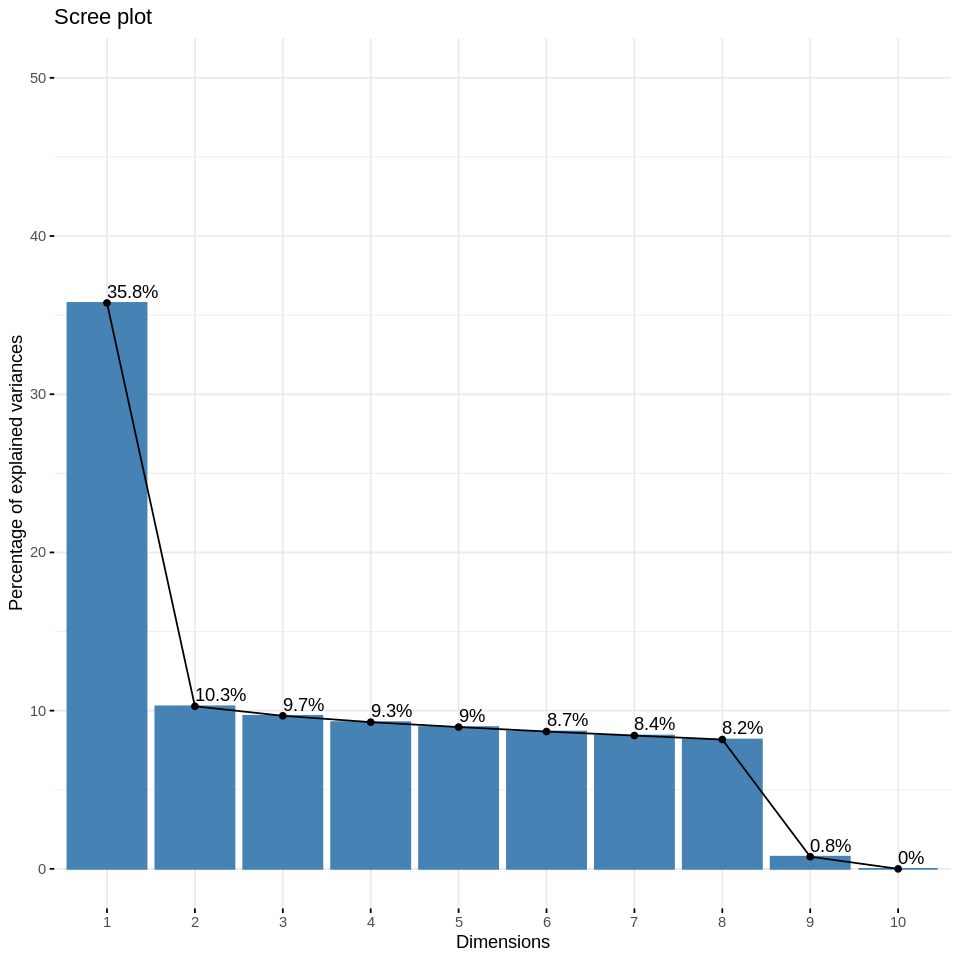

In [108]:
library(factoextra)
library(FactoMineR)
res.pca <- PCA(Df2,  graph = FALSE)
# visualize eigenvalues/variances
fviz_screeplot(res.pca, addlabels = TRUE, ylim = c(0, 50))

We observe that the first eight variables are able to expalin most of the variance in the dataset. 

In [109]:
install.packages("farver")
require(farver)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: farver



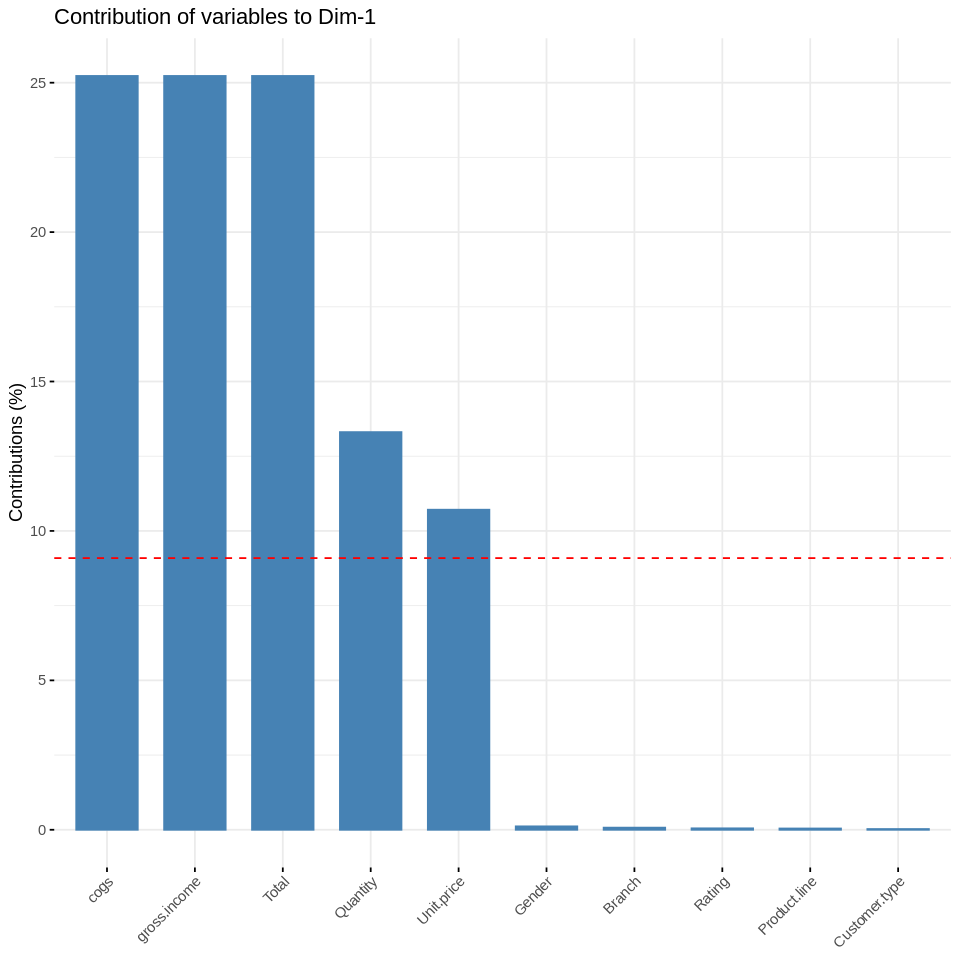

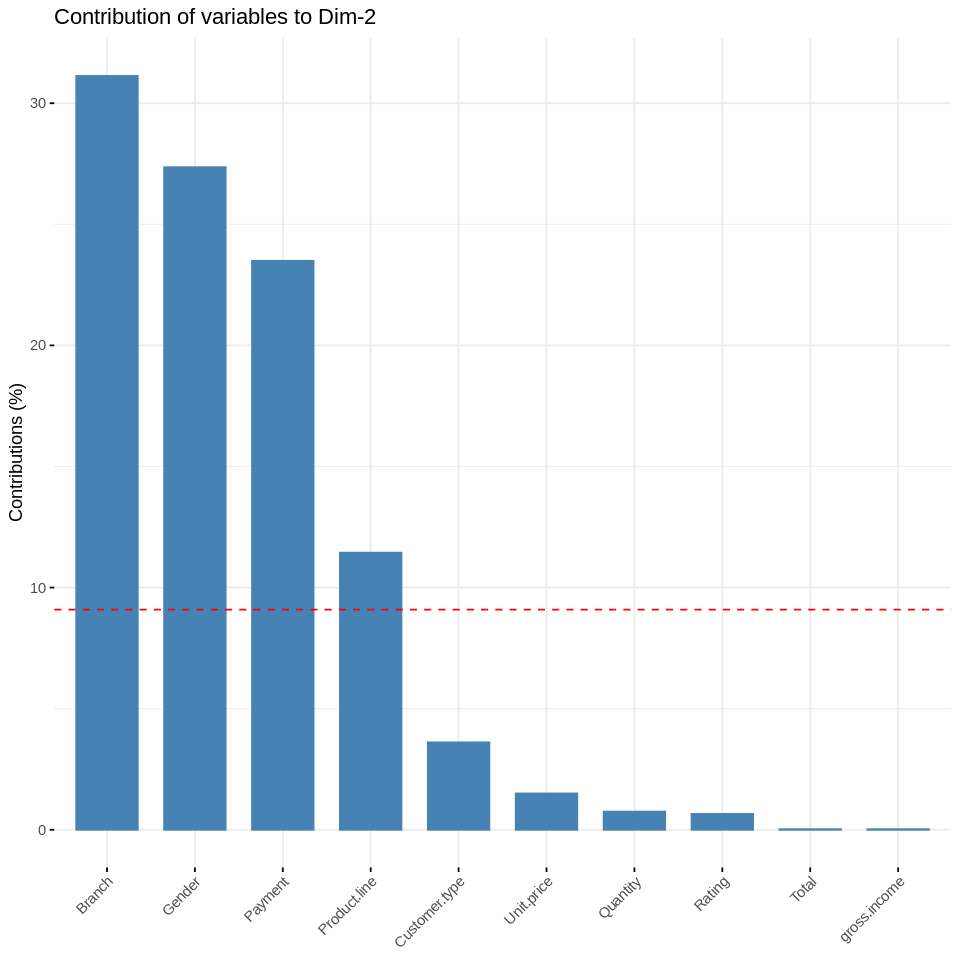

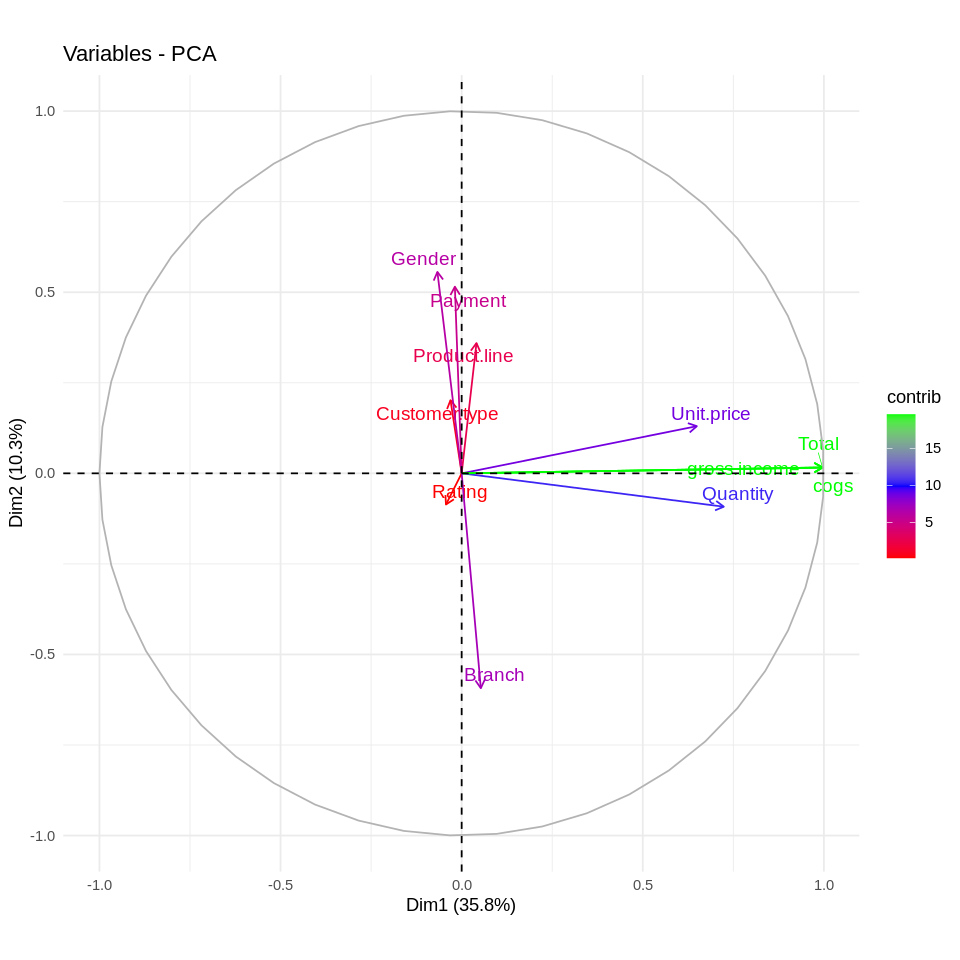

In [110]:
# Extract the results for variables
var <- get_pca_var(res.pca)# Contributions of variables to PC1
fviz_contrib(res.pca, choice = "var", axes = 1, top = 10)# Contributions of variables to PC2
fviz_contrib(res.pca, choice = "var", axes = 2, top = 10)# Control variable colors using their contributions to the principle axis
fviz_pca_var(res.pca, col.var="contrib",
             gradient.cols = c("red", "blue", "green"),
             repel = TRUE) + theme_minimal() + ggtitle("Variables - PCA")



The branch, product line, gender and payment mode seem to give the highest contribution. We also observe how the variables increase and decrease parallel to and relation with each other. 

In [122]:
sup_pca <- prcomp(Df2, center = TRUE, scale. = TRUE)
summary(sup_pca)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5    PC6     PC7
Standard deviation     1.9836 1.0631 1.03159 1.00991 0.99289 0.9771 0.96270
Proportion of Variance 0.3577 0.1027 0.09674 0.09272 0.08962 0.0868 0.08425
Cumulative Proportion  0.3577 0.4604 0.55719 0.64991 0.73953 0.8263 0.91058
                           PC8     PC9      PC10      PC11
Standard deviation     0.94823 0.29062 3.017e-15 6.808e-16
Proportion of Variance 0.08174 0.00768 0.000e+00 0.000e+00
Cumulative Proportion  0.99232 1.00000 1.000e+00 1.000e+00

In [114]:
str(Df2)

'data.frame':	1000 obs. of  11 variables:
 $ Unit.price   : num  -9.43 -10.03 -9.72 -9.6 -9.32 ...
 $ Quantity     : num  -0.4 -0.6 -0.4 -0.3 -0.4 -0.4 -0.5 -0.1 -0.9 -0.8 ...
 $ cogs         : num  -9.65 -10.1 -9.85 -9.71 -9.57 ...
 $ gross.income : num  0.00777 -0.4418 -0.19215 -0.0497 0.08969 ...
 $ Rating       : num  -3.49 -3.44 -3.66 -3.56 -3.87 -3.99 -3.82 -3.6 -3.68 -3.81 ...
 $ Total        : num  -10.2 -10.6 -10.4 -10.2 -10.1 ...
 $ Branch       : num  -1 -0.333 -1 -1 -1 ...
 $ Customer.type: num  -1 -0.5 -0.5 -1 -0.5 -0.5 -1 -0.5 -1 -1 ...
 $ Gender       : num  -1 -1 -0.5 -0.5 -0.5 -0.5 -1 -1 -1 -1 ...
 $ Product.line : num  -0.5 -1 -0.333 -0.5 -0.167 ...
 $ Payment      : num  -0.333 -1 -0.667 -0.333 -0.333 ...


In [124]:
names(Df1)

[1] "Invoice.ID"              "Branch"                 
 [3] "Customer.type"           "Gender"                 
 [5] "Product.line"            "Unit.price"             
 [7] "Quantity"                "Date"                   
 [9] "Time"                    "Payment"                
[11] "cogs"                    "gross.margin.percentage"
[13] "gross.income"            "Rating"                 
[15] "Total"                   "Label"

In [125]:
# implement PCA with prcomp
carr4.pca <- prcomp(Df1[c(6,7,11,13,14)], center = TRUE, scale. = TRUE)
summary(carr4.pca)

Importance of components:
                          PC1    PC2    PC3     PC4       PC5
Standard deviation     1.7136 1.0002 0.9939 0.27466 1.557e-16
Proportion of Variance 0.5873 0.2001 0.1976 0.01509 0.000e+00
Cumulative Proportion  0.5873 0.7874 0.9849 1.00000 1.000e+00

In [126]:
str(carr4.pca)

List of 5
 $ sdev    : num [1:5] 1.71 1.00 9.94e-01 2.75e-01 1.56e-16
 $ rotation: num [1:5, 1:5] -0.382 -0.425 -0.58 -0.58 0.027 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:5] "Unit.price" "Quantity" "cogs" "gross.income" ...
  .. ..$ : chr [1:5] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:5] 55.67 5.51 307.59 15.38 6.97
  ..- attr(*, "names")= chr [1:5] "Unit.price" "Quantity" "cogs" "gross.income" ...
 $ scale   : Named num [1:5] 26.49 2.92 234.18 11.71 1.72
  ..- attr(*, "names")= chr [1:5] "Unit.price" "Quantity" "cogs" "gross.income" ...
 $ x       : num [1:1000, 1:5] -1.524 1.843 -0.158 -1.16 -2.154 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:5] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


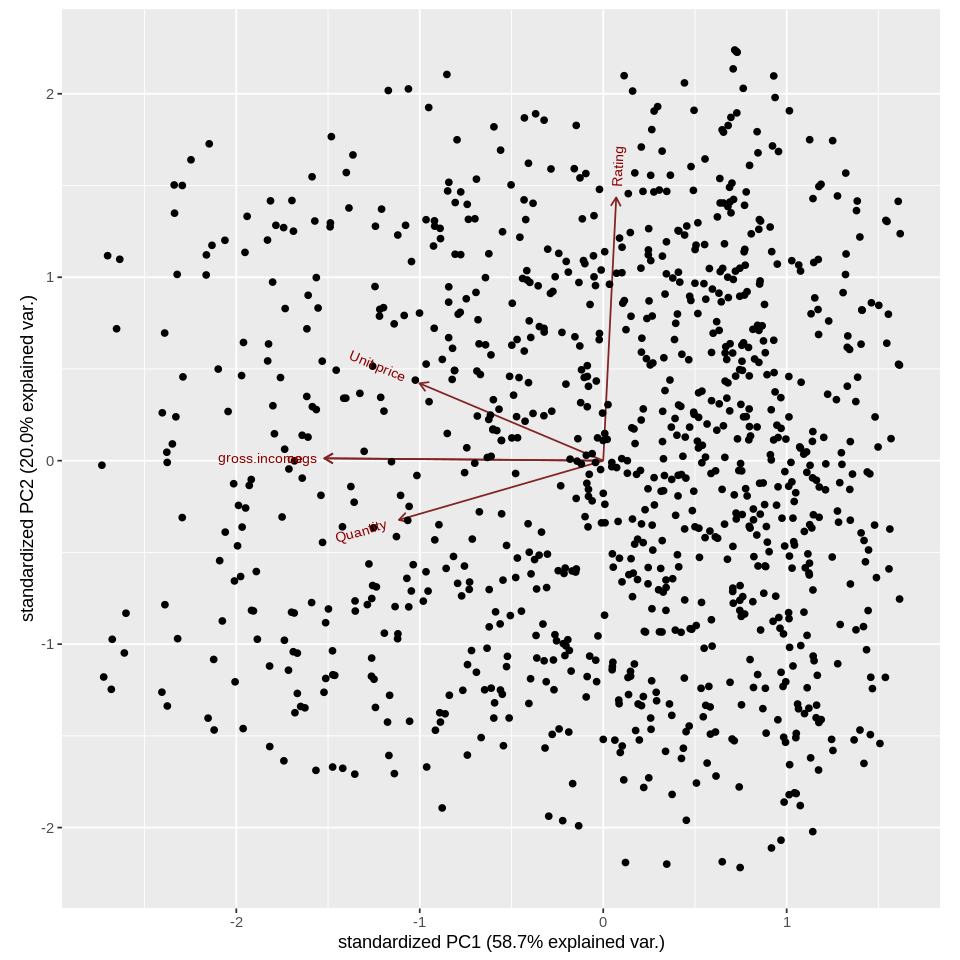

In [127]:
# plot PCA graph
ggbiplot(carr4.pca)

In [131]:
install.packages("Rtsne")
library(Rtsne)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [132]:
#we explore t-SNe
tsne <- Rtsne(Df2, dims = 2, perplexity=30, verbose=TRUE, max_iter = 500)

Performing PCA
Read the 1000 x 11 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.11 seconds (sparsity = 0.109628)!
Learning embedding...
Iteration 50: error is 71.157733 (50 iterations in 0.15 seconds)
Iteration 100: error is 71.157731 (50 iterations in 0.15 seconds)
Iteration 150: error is 71.157366 (50 iterations in 0.17 seconds)
Iteration 200: error is 71.087174 (50 iterations in 0.16 seconds)
Iteration 250: error is 70.781036 (50 iterations in 0.13 seconds)
Iteration 300: error is 1.636538 (50 iterations in 0.14 seconds)
Iteration 350: error is 1.441286 (50 iterations in 0.12 seconds)
Iteration 400: error is 1.382864 (50 iterations in 0.13 seconds)
Iteration 450: error is 1.358392 (50 iterations in 0.13 seconds)
Iteration 500: error is 1.340299 (50 iterations in 0.13 seconds)
Fitting performed in 1.40 seconds.


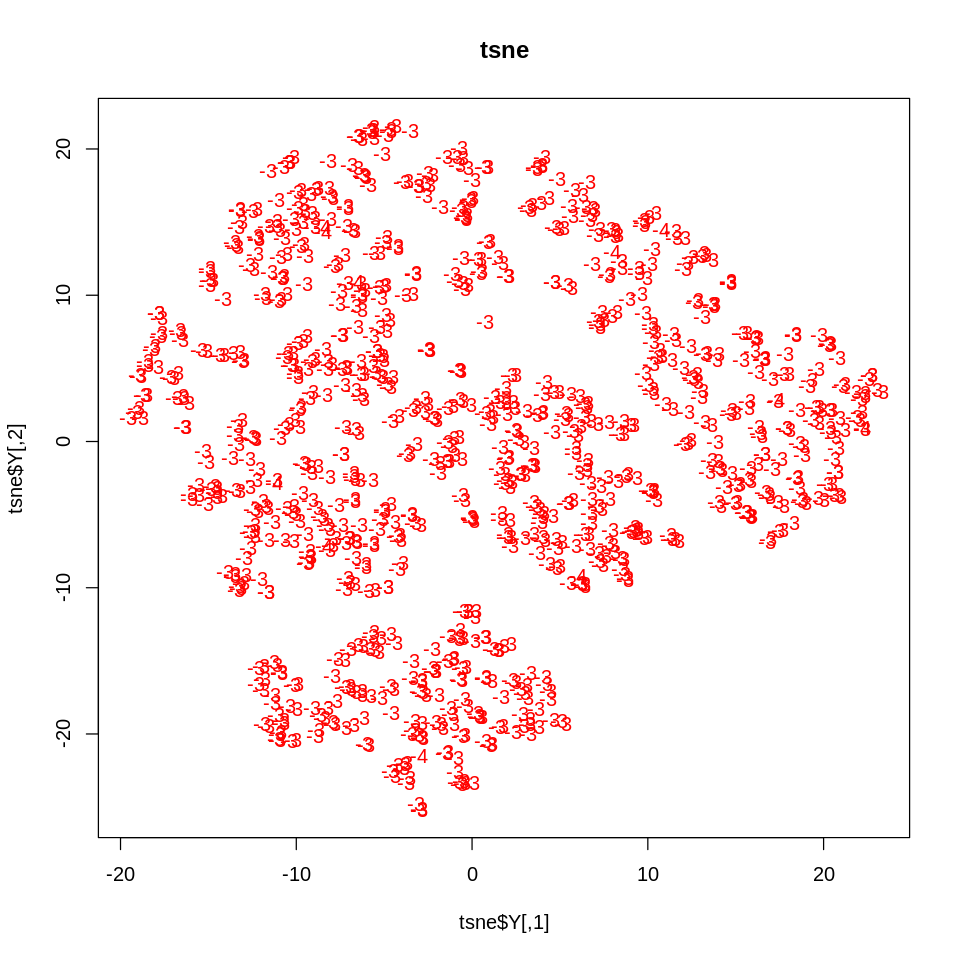

In [135]:
Df2$Rating_num = as.integer(Df2$Rating)

# Curating the database for analysis 
# 
Labels<-Df2$Rating_num
Df2$Rating_num<-as.factor(Df2$Rating_num)

# For plotting
colors = rainbow(length(Df2$Rating_num))
names(colors) = unique(Df2$Rating_num)

plot(tsne$Y, t='n', main="tsne")
text(tsne$Y, labels=Df2$Rating_num, col=colors[Df2$Rating_num])

We can see that the variables that contribute the most to overall variance are branch, product line, gender ,payment mode and customer type. We now proceed to feature selection.

In [136]:

# Installing and loading our caret package
# ---
# 
suppressWarnings(
        suppressMessages(if
                         (!require(caret, quietly=TRUE))
                install.packages("caret")))
library(caret)

In [159]:
sol = subset(Df1, select = -c(Invoice.ID, gross.margin.percentage, Label ) )


'data.frame':	1000 obs. of  13 variables:
 $ Branch       : Factor w/ 3 levels "A","B","C": 1 3 1 1 1 3 1 3 1 2 ...
 $ Customer.type: Factor w/ 2 levels "Member","Normal": 1 2 2 1 2 2 1 2 1 1 ...
 $ Gender       : Factor w/ 2 levels "Female","Male": 1 1 2 2 2 2 1 1 1 1 ...
 $ Product.line : Factor w/ 6 levels "Electronic accessories",..: 4 1 5 4 6 1 1 5 4 3 ...
 $ Unit.price   : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity     : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Date         : chr  "1/5/2019" "3/8/2019" "3/3/2019" "1/27/2019" ...
 $ Time         : chr  "13:08" "10:29" "13:23" "20:33" ...
 $ Payment      : Factor w/ 3 levels "Cash","Credit card",..: 3 1 2 3 3 3 3 3 2 2 ...
 $ cogs         : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross.income : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Rating       : num  9.1 9.6 7.4 8.4 5.3 4.1 5.8 8 7.2 5.9 ...
 $ Total        : num  549 80.2 340.5 489 634.4 ...


In [160]:
# encode the categorical columns
library(CatEncoders)
# Saving names of categorical variables
factors <- names(which(sapply(sol, is.factor)))

# Label Encoder
for (i in factors){
  encode <- LabelEncoder.fit(sol[, i])
  sol[, i] <- transform(encode, sol[, i])
}
head(sol)

,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Date,Time,Payment,cogs,gross.income,Rating,Total
,<int>,<int>,<int>,<int>,<dbl>,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1,4,74.69,7,1/5/2019,13:08,3,522.83,26.1415,9.1,548.9715
2,3,2,1,1,15.28,5,3/8/2019,10:29,1,76.40,3.8200,9.6,80.2200
3,1,2,2,5,46.33,7,3/3/2019,13:23,2,324.31,16.2155,7.4,340.5255
4,1,1,2,4,58.22,8,1/27/2019,20:33,3,465.76,23.2880,8.4,489.0480
5,1,2,2,6,86.31,7,2/8/2019,10:37,3,604.17,30.2085,5.3,634.3785
6,3,2,2,1,85.39,7,3/25/2019,18:30,3,597.73,29.8865,4.1,627.6165


In [164]:
sol = subset(sol, select = -c(Time) )
sol = as.data.frame(apply(sol, 2,  function(x) (x - min(x))/max(x) - min(x)))


In [166]:
fear <- cbind(sol)
dim(fear)

[1] 1000   11

In [168]:
correlationMatrix <- cor(fear)
highcorr <- findCorrelation(correlationMatrix, cutoff=0.75)
names(fear[,highcorr])

[1] "cogs"         "gross.income"

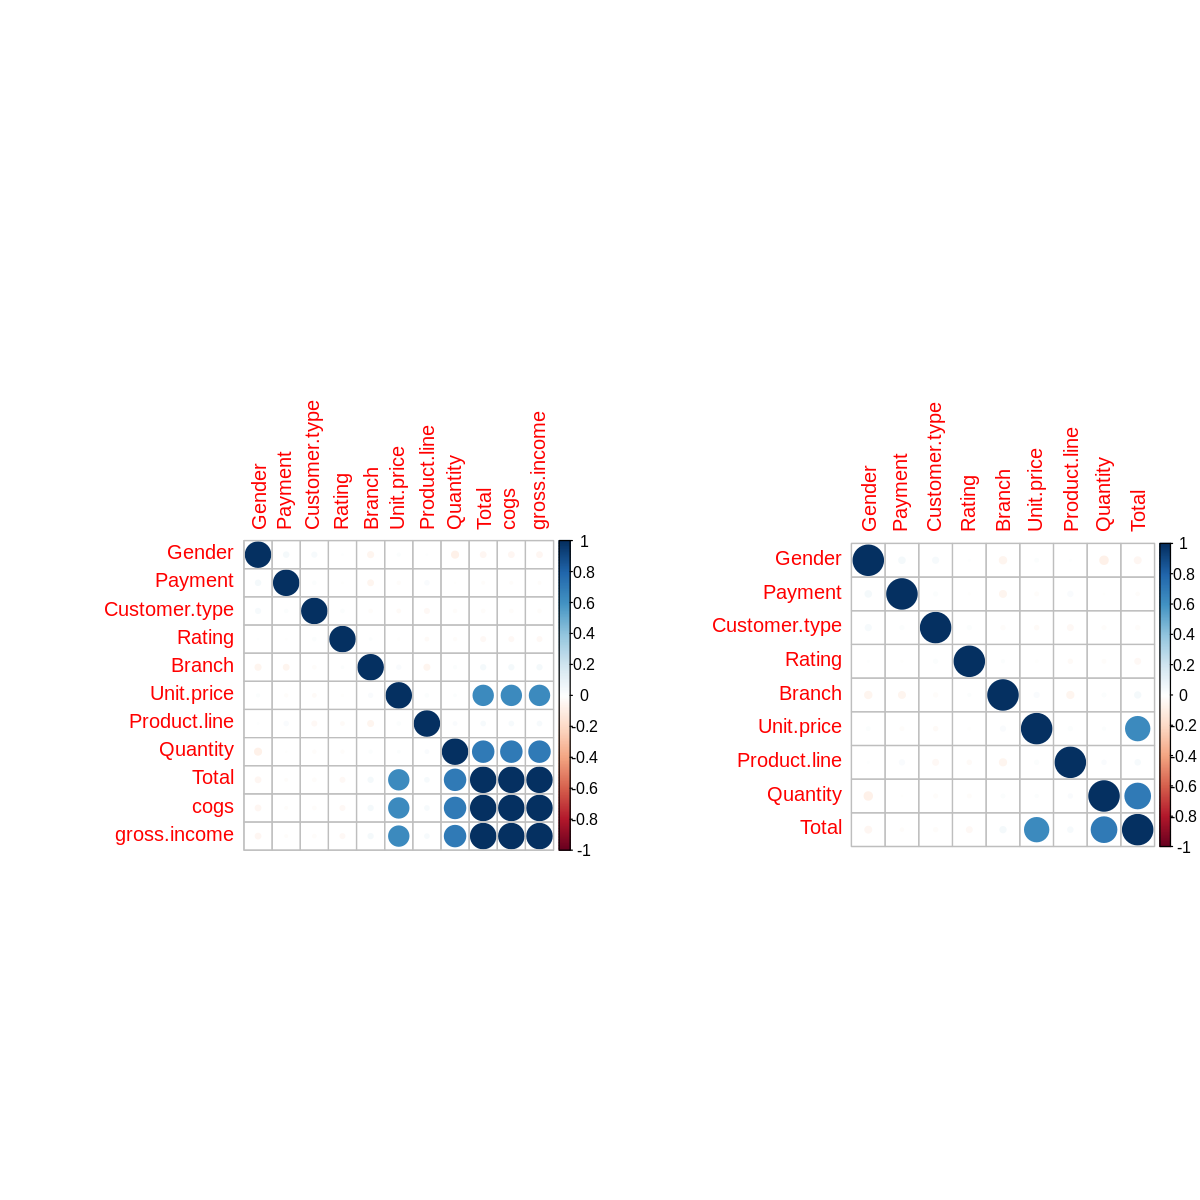

In [170]:
options(repr.plot.width = 10, repr.plot.height = 10)
fea <- fear[-highcorr]

# Performing our graphical comparison
# ---
# 
par(mfrow = c(1, 2))
corrplot(correlationMatrix, order = "hclust")
corrplot(cor(fea), order = "hclust")

From this we can see that cogs, gross.income and the total columns are important.


In [171]:
#we apply feature ranking
# install Fselector
suppressWarnings(
        suppressMessages(if
                         (!require(FSelector, quietly=TRUE))
                install.packages("FSelector")))
library(FSelector)

In [172]:
Scores <- linear.correlation(fear)
Scores

,attr_importance
,<dbl>
Customer.type,0.01960787
Gender,0.05631756
Product.line,0.05393756
Unit.price,0.02820244
Quantity,0.01596379
Payment,0.05010429
cogs,0.04104666
gross.income,0.04104666
Rating,0.01023848


In [173]:
# pick 8 of the most important features as PCA previously presented 8 as an appropriate number
Subset <- cutoff.k(Scores, 8)
as.data.frame(Subset)

Subset
<chr>
Gender
Product.line
Payment
cogs
Total
gross.income
Unit.price
Customer.type


In [174]:
suppressWarnings(
        suppressMessages(if
                         (!require(wskm, quietly=TRUE))
                install.packages("wskm")))
library(wskm)

Loading required package: latticeExtra


Attaching package: ‘latticeExtra’


The following object is masked from ‘package:ggplot2’:

    layer


Loading required package: fpc



In [175]:
suppressWarnings(
        suppressMessages(if
                         (!require(cluster, quietly=TRUE))
                install.packages("cluster")))
library("cluster")
library("fpc")

In [178]:
names(sol)

[1] "Branch"        "Customer.type" "Gender"        "Product.line" 
 [5] "Unit.price"    "Quantity"      "Payment"       "cogs"         
 [9] "gross.income"  "Rating"        "Total"

In [186]:
numeric_cols <- sol[c(5,8,9,10,11)]

In [187]:
set.seed(10)
model <- ewkm(numeric_cols, 3, lambda=3, maxiter=1000)

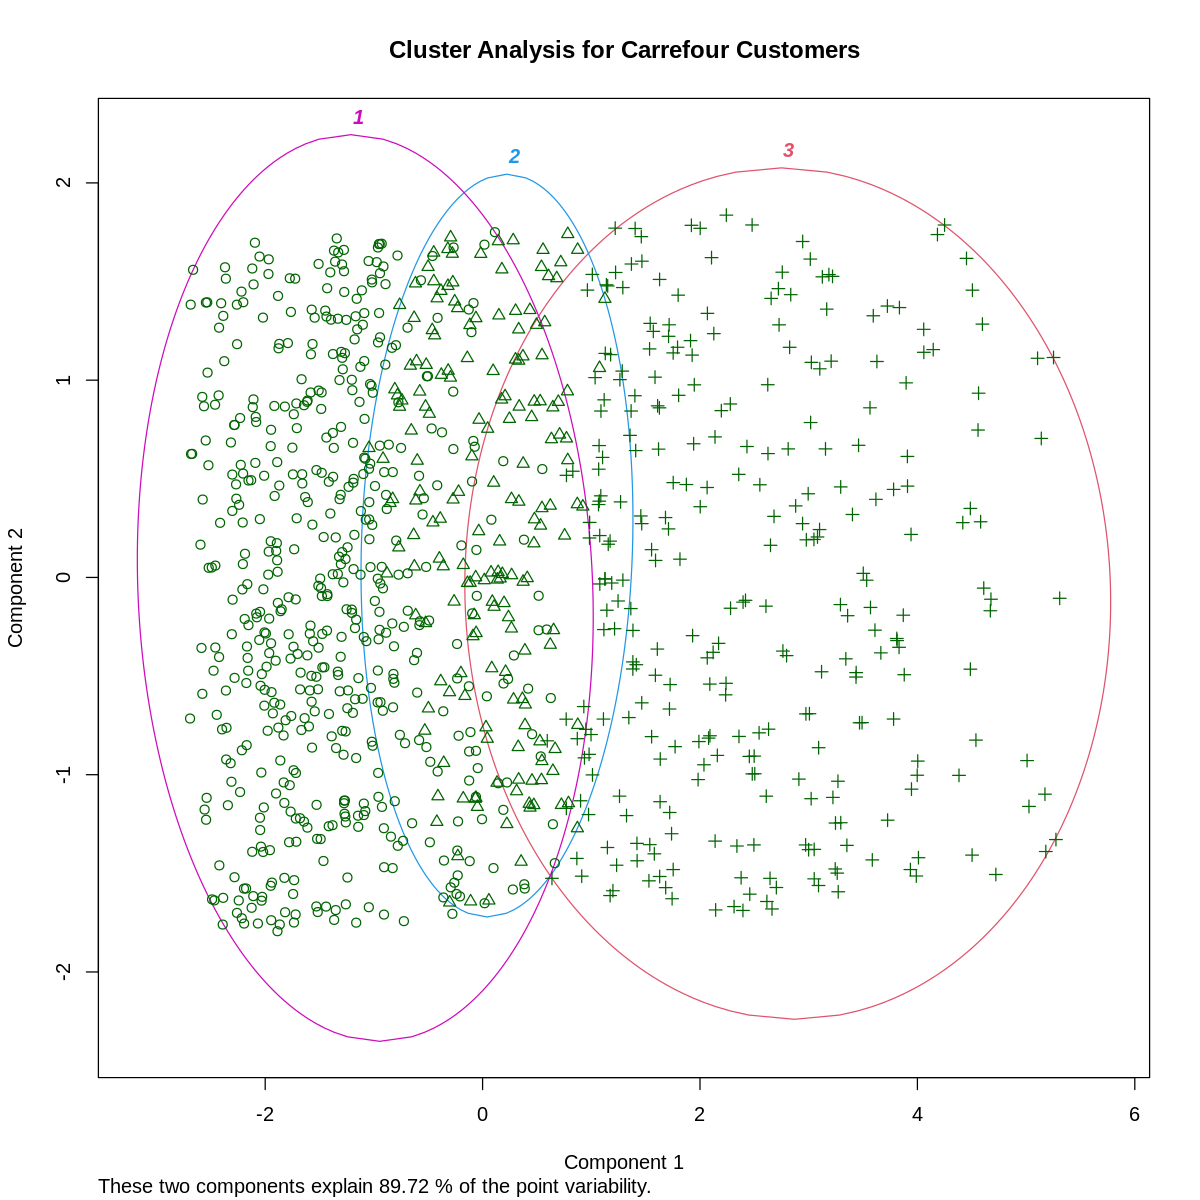

In [188]:
# Cluster Plot against 1st 2 principal components
# ---
#
clusplot(numeric_cols, model$cluster, color=TRUE, shade=F,
         labels=4, lines=1,main='Cluster Analysis for Carrefour Customers')

In [182]:
round(model$weights*100,2)

,Unit.price,cogs,gross.income,Rating,Total
1,0.00,33.16,33.16,0.50,33.16
2,11.80,26.81,26.81,7.78,26.81
3,36.56,17.79,17.79,10.06,17.79


10. Conclusion

The analysis revals that 8 principal compemnets are enough to explin variance in the dataset, and it is possible to cluster the information in groups that provide further insight.